### import libraries and dataset

In [32]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load the data
data = pd.read_csv('dataset/prepared_data.csv', sep=";")
# print(data.columns)

### scatterplot GDP vs Total CO2 emmission & GDP per Capita vs. CO2 Emissions per Capita

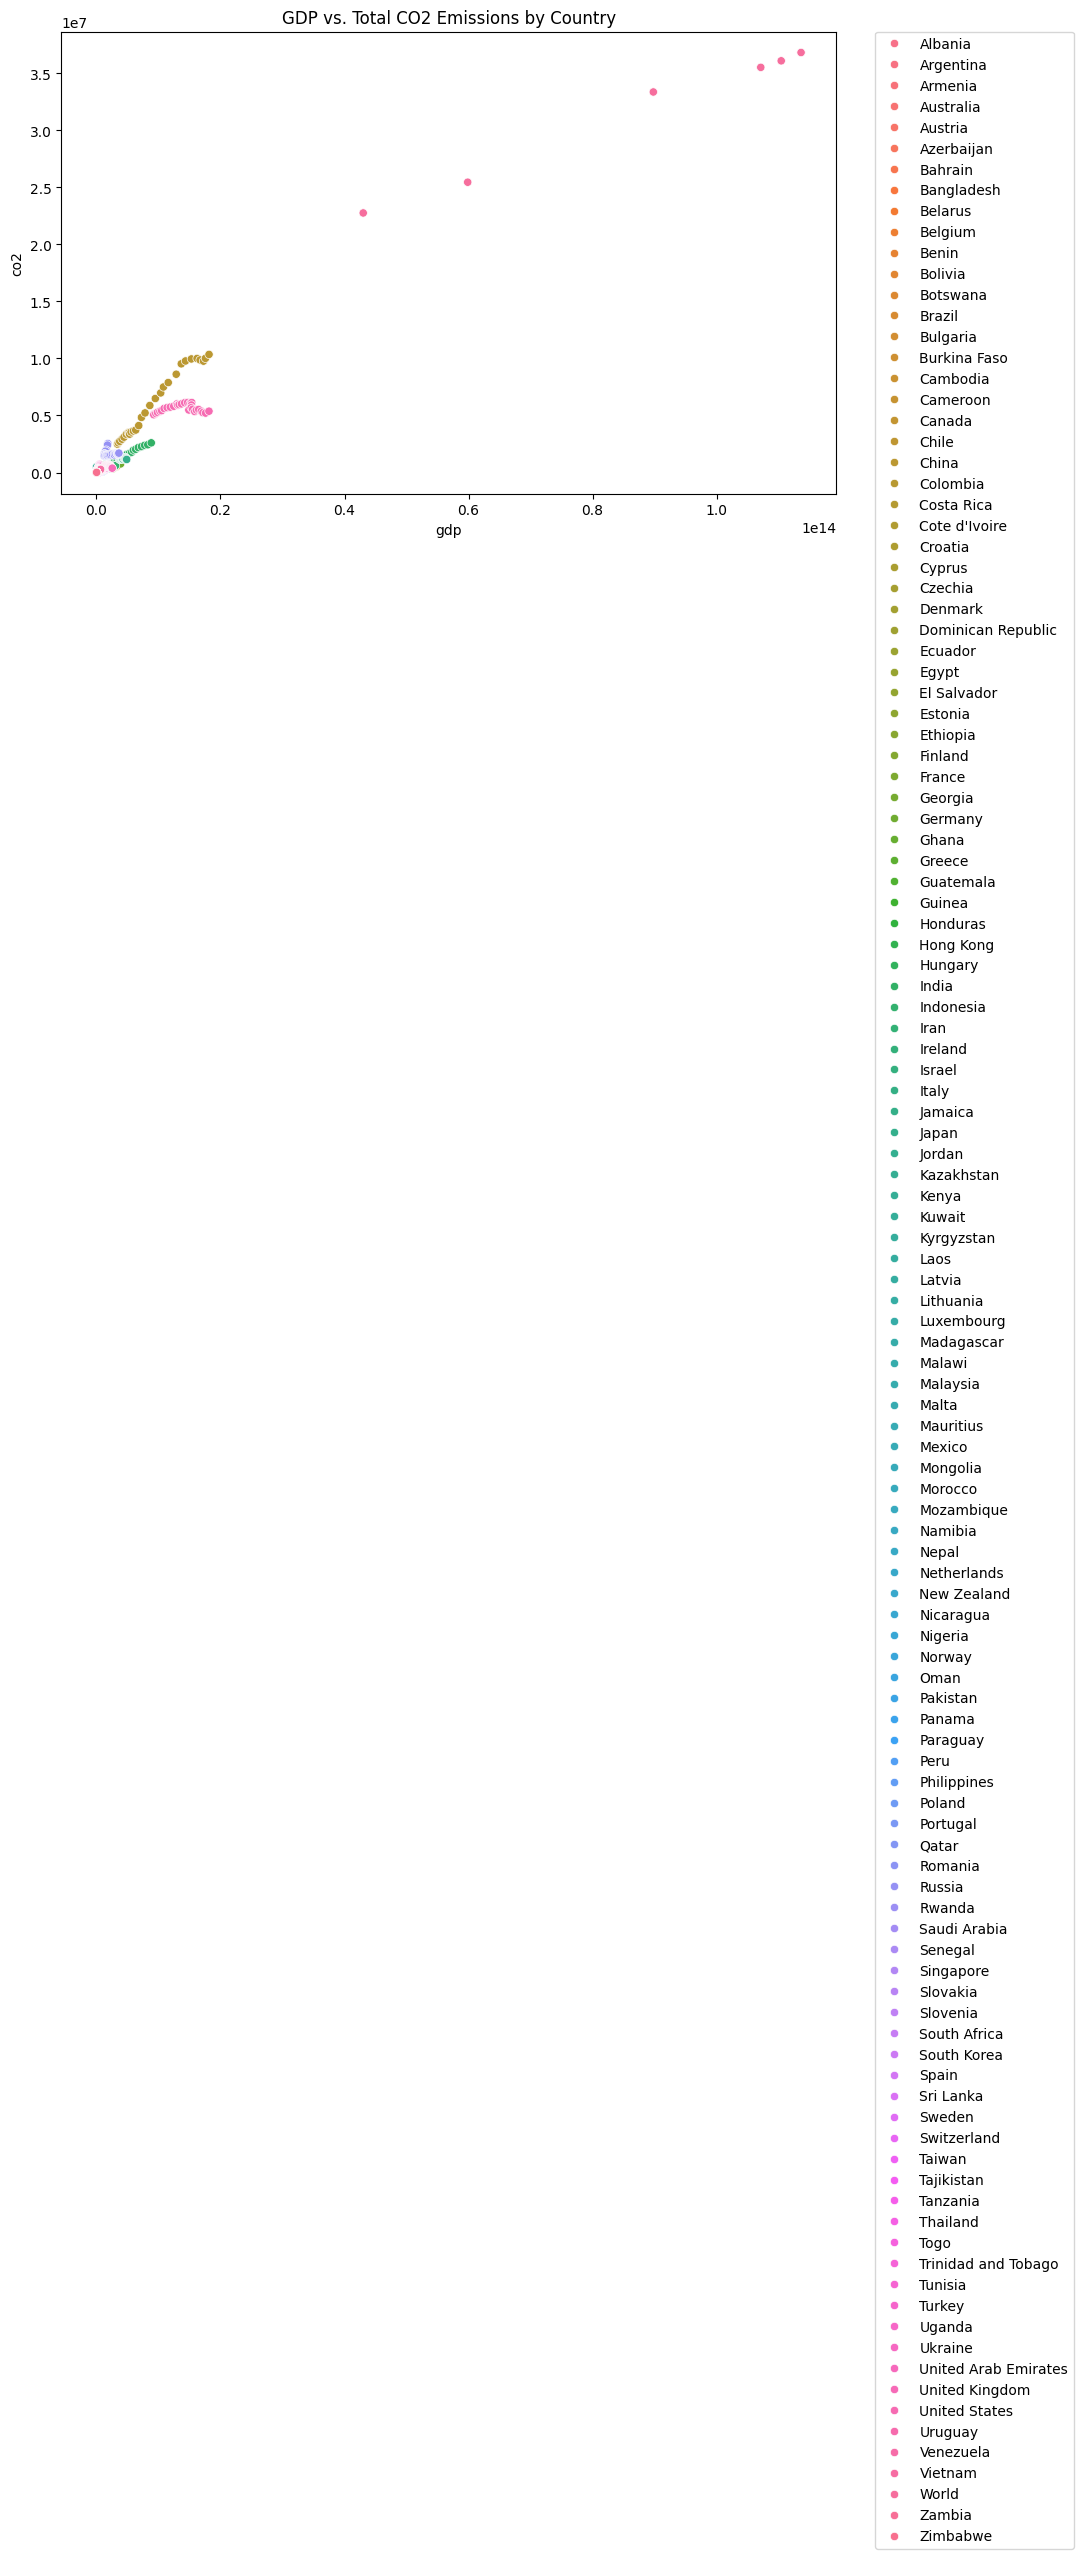

In [115]:
plt.figure(figsize=(10, 6))
plot = sns.scatterplot(x='gdp', y='co2', hue='country', data=data)
plt.title("GDP vs. Total CO2 Emissions by Country")
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

### line chart time series of gdp

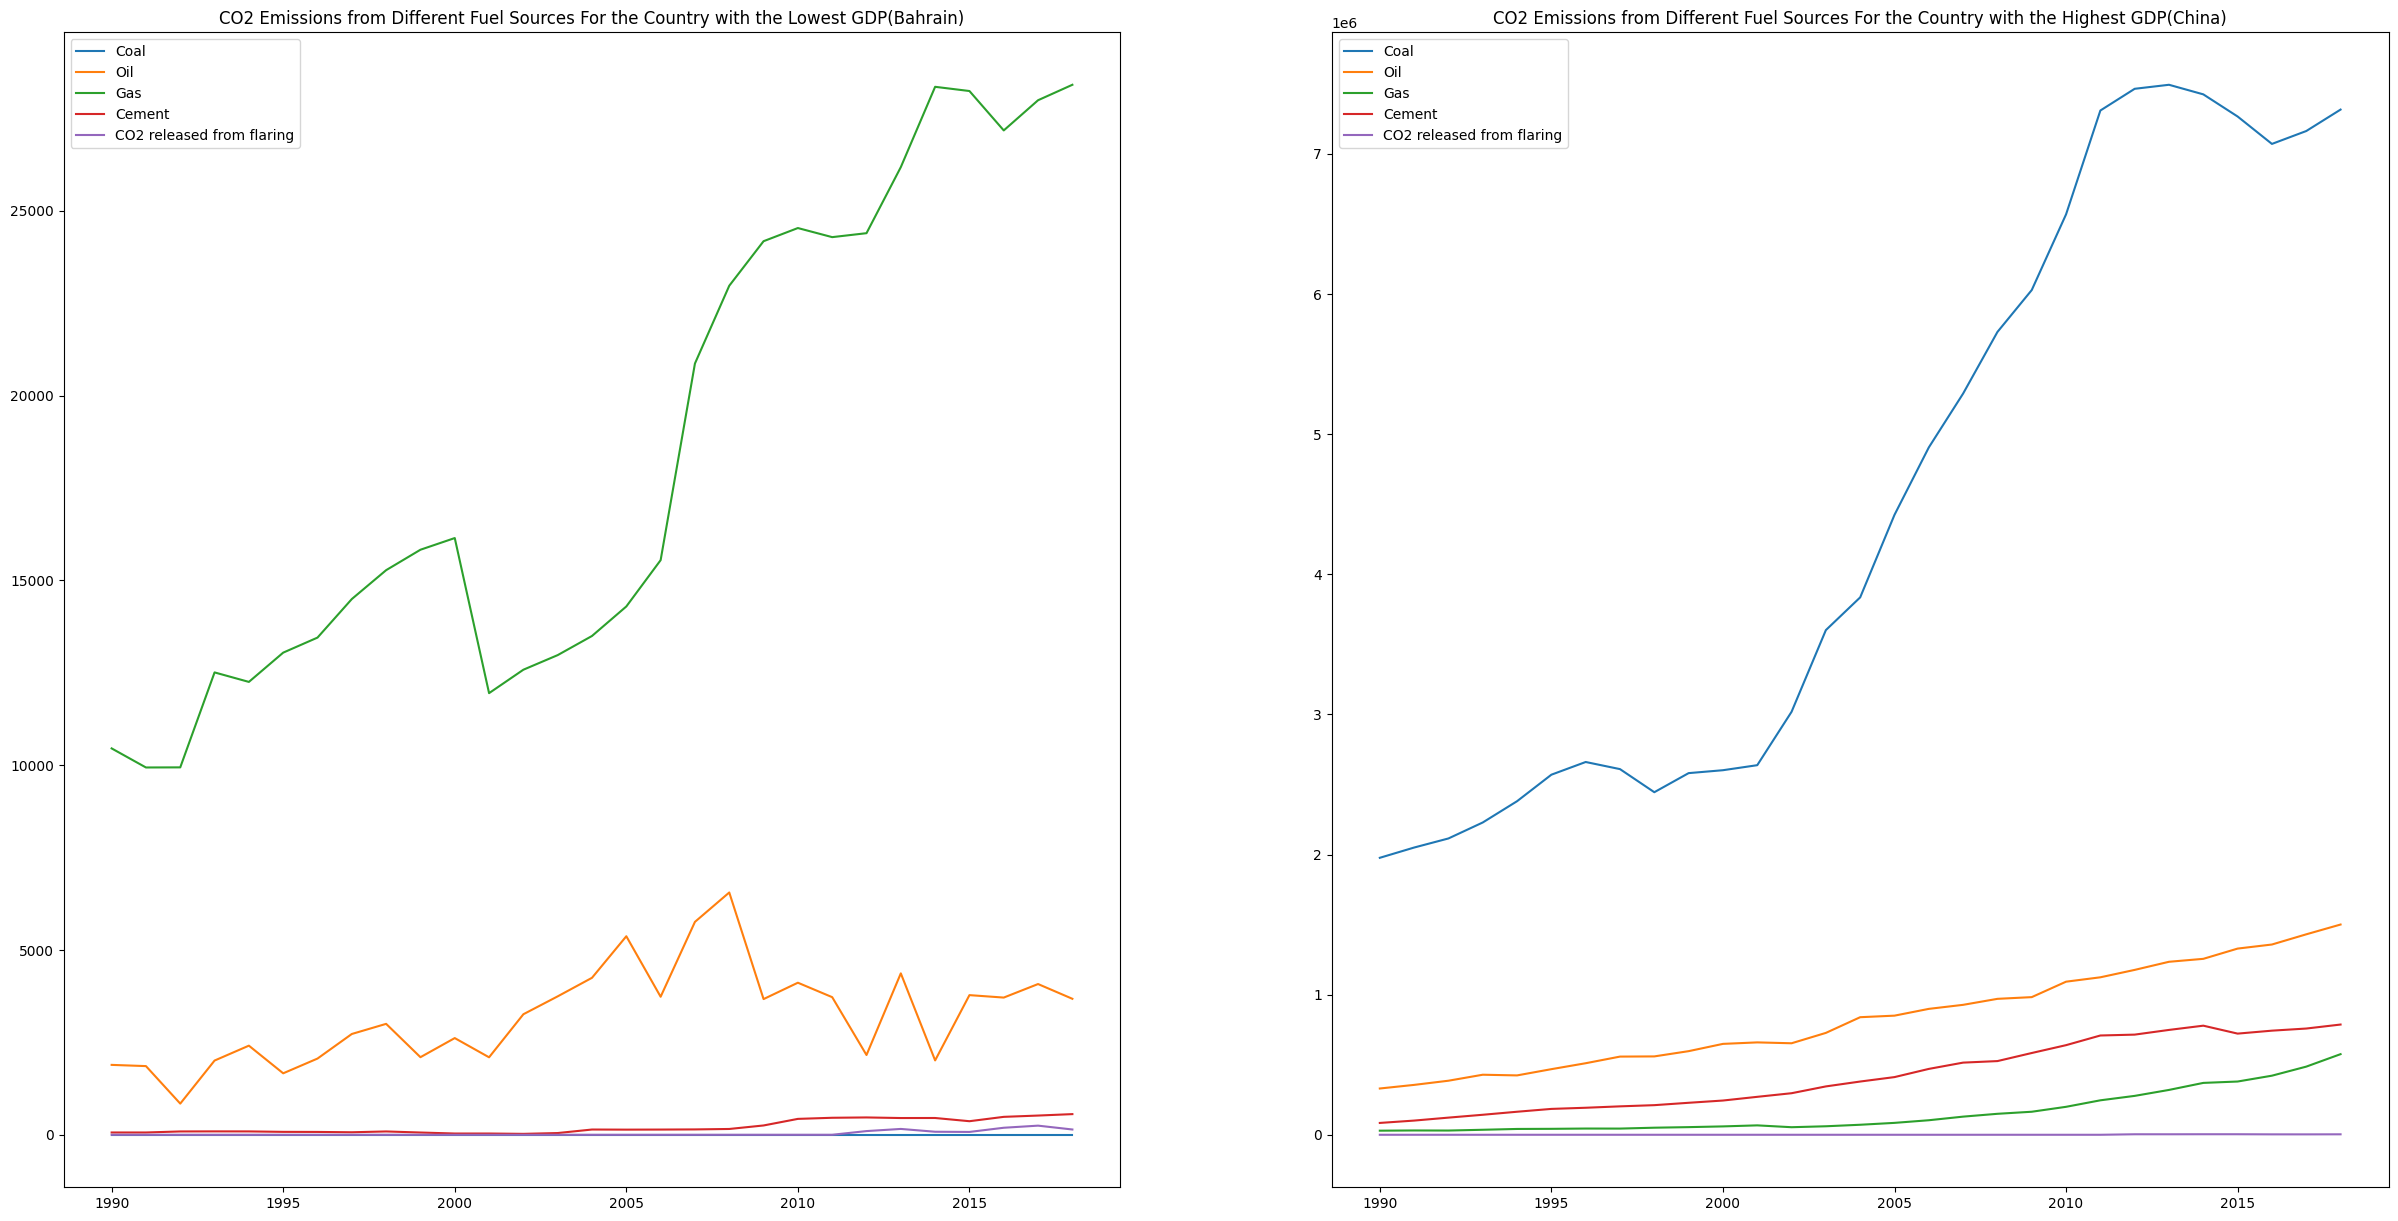

In [116]:
# remove world data
data = data[data['country'] != 'World']

# find the country with the lowest and highest GDP
lowest_gdp_country = data.loc[data['gdp'].idxmin(), 'country']
max_gdp_country = data.loc[data['gdp'].idxmax(), 'country']

# get all the rows for the countries with the lowest and highest GDP
lowest_gdp_country_rows = data[data['country'] == lowest_gdp_country]
max_gdp_country_rows = data[data['country'] == max_gdp_country]

plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
plt.plot(lowest_gdp_country_rows['year'], lowest_gdp_country_rows['coal_co2'], label='Coal')
plt.plot(lowest_gdp_country_rows['year'], lowest_gdp_country_rows['oil_co2'], label='Oil')
plt.plot(lowest_gdp_country_rows['year'], lowest_gdp_country_rows['gas_co2'], label='Gas')
plt.plot(lowest_gdp_country_rows['year'], lowest_gdp_country_rows['cement_co2'], label='Cement')
plt.plot(lowest_gdp_country_rows['year'], lowest_gdp_country_rows['flaring_co2'], label='CO2 released from flaring')
plt.legend()
plt.title(f"CO2 Emissions from Different Fuel Sources For the Country with the Lowest GDP({lowest_gdp_country})")

plt.subplot(1, 2, 2)
plt.plot(max_gdp_country_rows['year'], max_gdp_country_rows['coal_co2'], label='Coal')
plt.plot(max_gdp_country_rows['year'], max_gdp_country_rows['oil_co2'], label='Oil')
plt.plot(max_gdp_country_rows['year'], max_gdp_country_rows['gas_co2'], label='Gas')
plt.plot(max_gdp_country_rows['year'], max_gdp_country_rows['cement_co2'], label='Cement')
plt.plot(max_gdp_country_rows['year'], max_gdp_country_rows['flaring_co2'], label='CO2 released from flaring')
plt.legend()
plt.title(f"CO2 Emissions from Different Fuel Sources For the Country with the Highest GDP({max_gdp_country})")

plt.show()

### bar plot Comparison of CO2 per GDP Across Countries

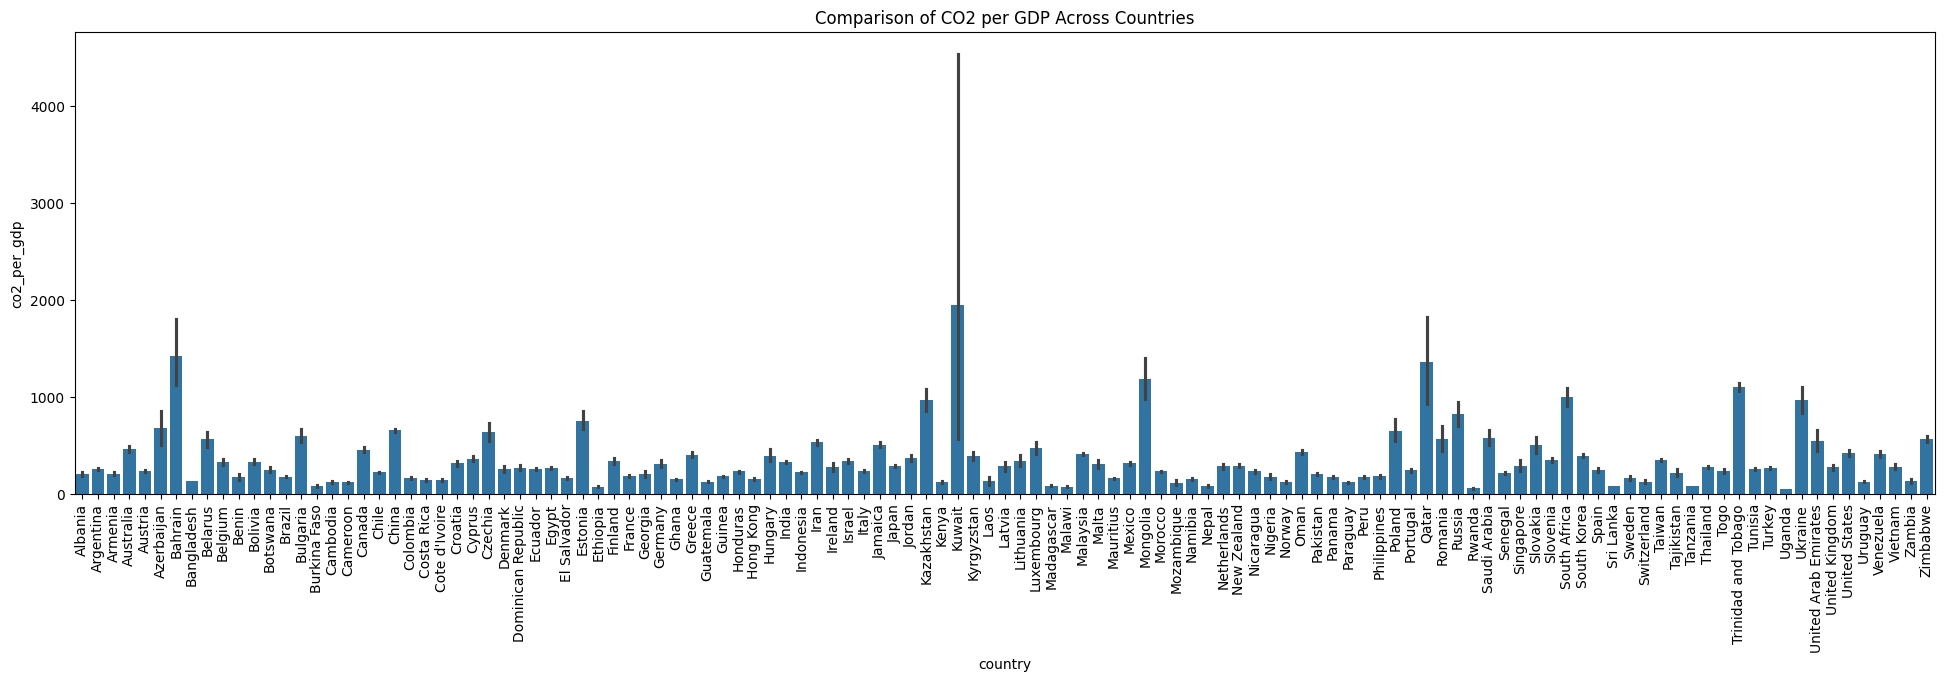

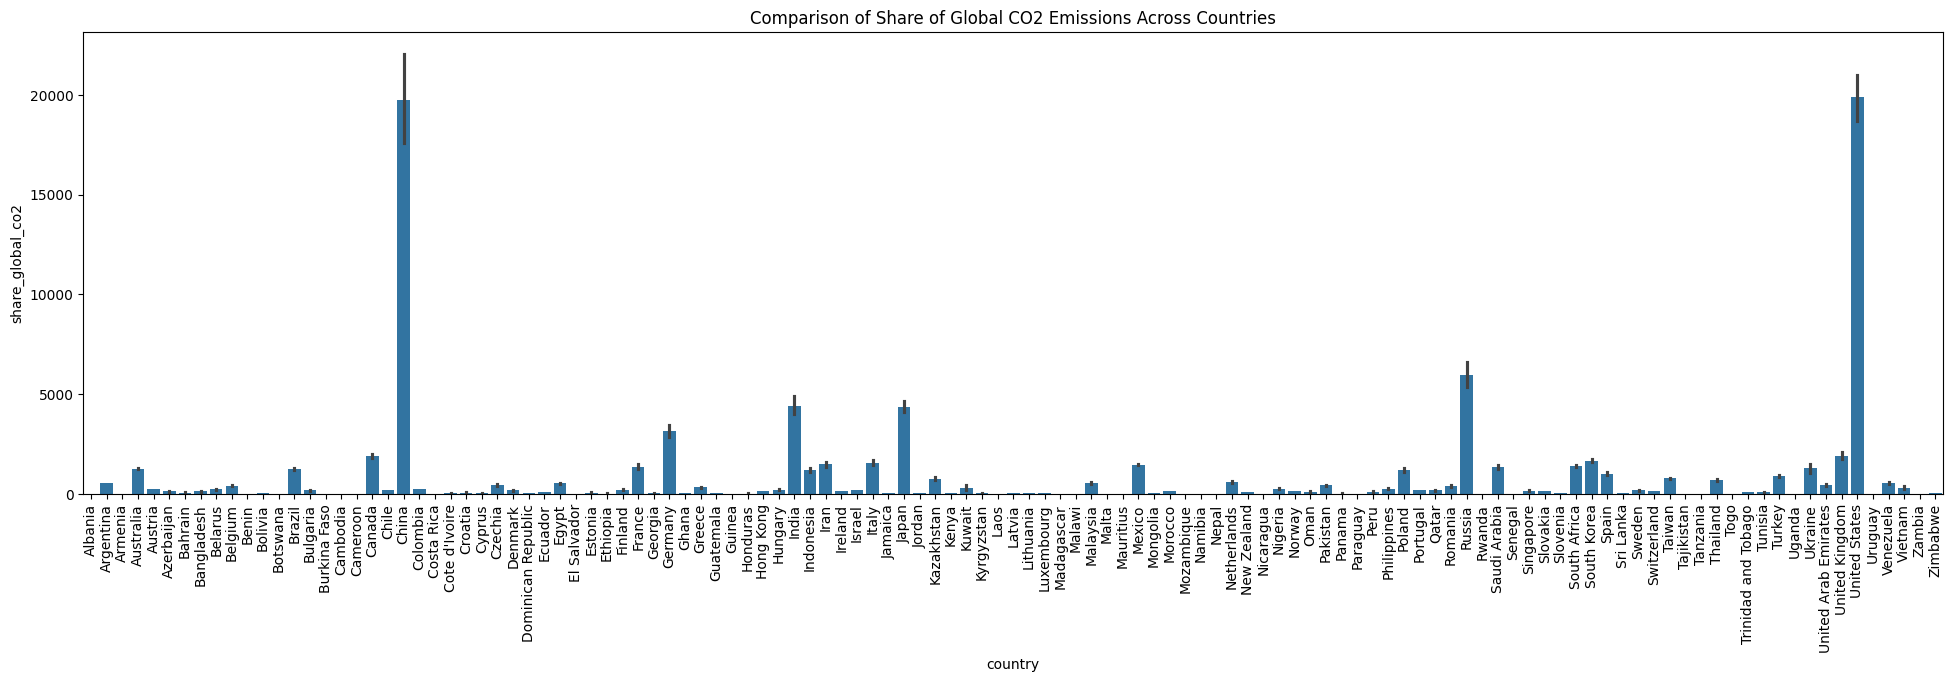

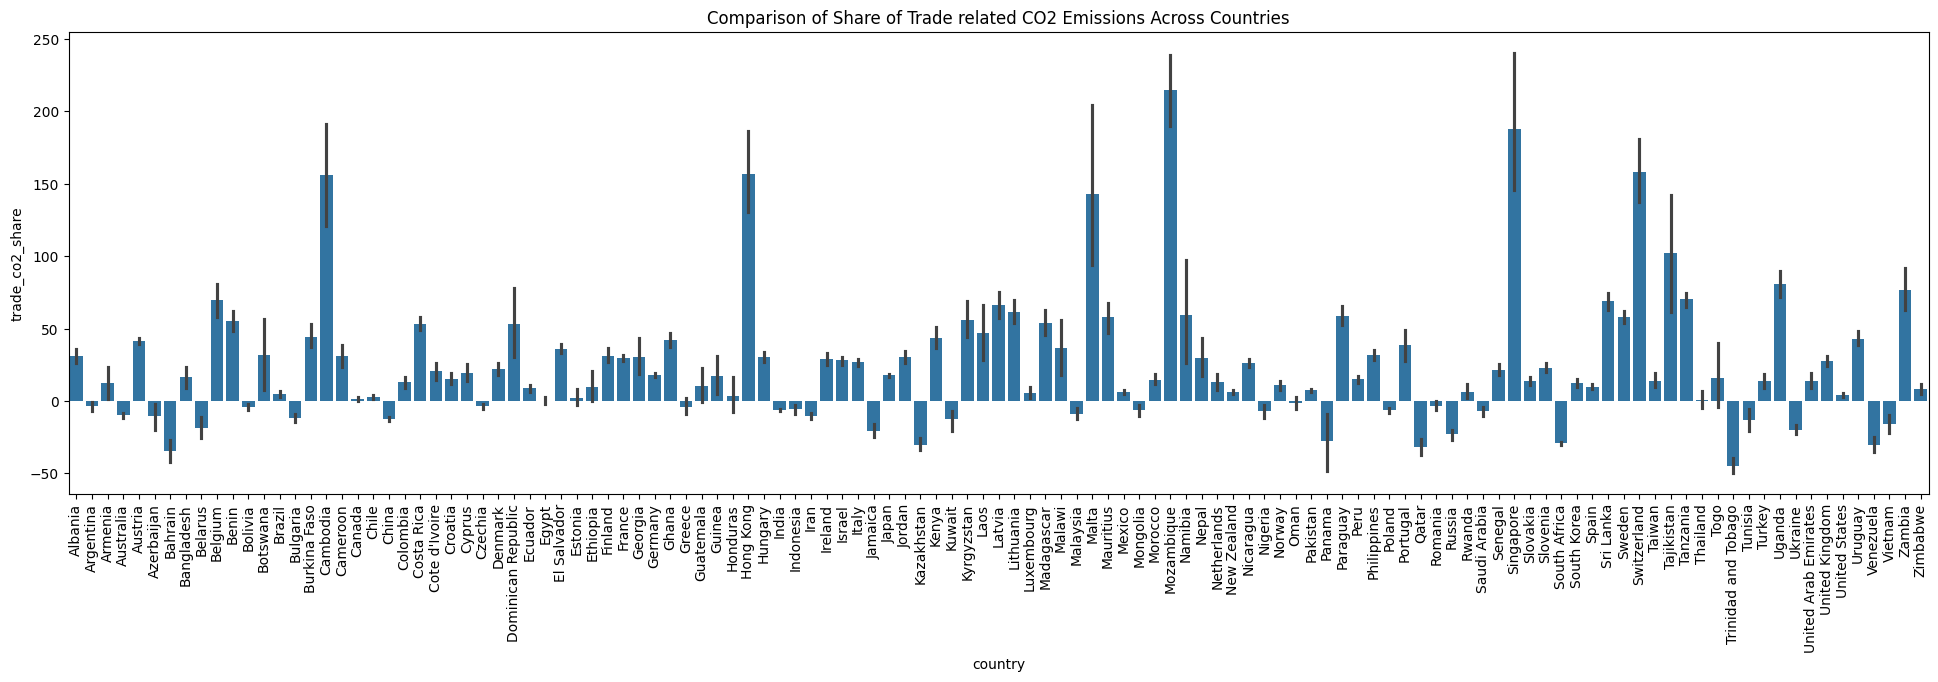

In [117]:
plt.figure(figsize=(24, 6))
sns.barplot(x='country', y='co2_per_gdp', data=data)
plt.title("Comparison of CO2 per GDP Across Countries")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(24, 6))
sns.barplot(x='country', y='share_global_co2', data=data)
plt.title("Comparison of Share of Global CO2 Emissions Across Countries")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(24, 6))
sns.barplot(x='country', y='trade_co2_share', data=data)
plt.title("Comparison of Share of Trade related CO2 Emissions Across Countries")
plt.xticks(rotation=90)
plt.show()

### heatmap

# heatmap CO2 vs GDP vs Consumption

Pearson Correlation between GDP and CO2 Emissions: PearsonRResult(statistic=np.float64(0.9413418905580304), pvalue=np.float64(0.0))
Pearson Correlation between GDP and Consumption CO2 Emissions: PearsonRResult(statistic=np.float64(0.9661930331757427), pvalue=np.float64(0.0))
Pearson Correlation between CO2 Emissions and Consumption CO2 Emissions: PearsonRResult(statistic=np.float64(0.9926718090640465), pvalue=np.float64(0.0))


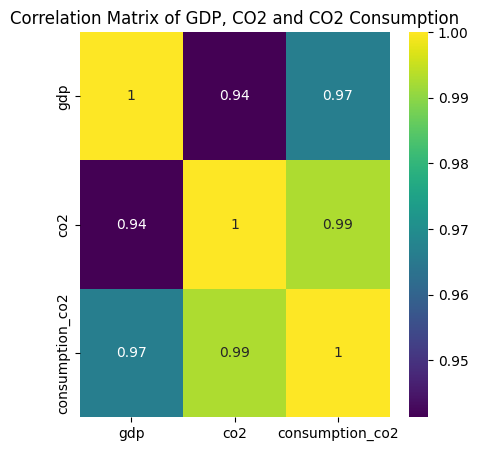

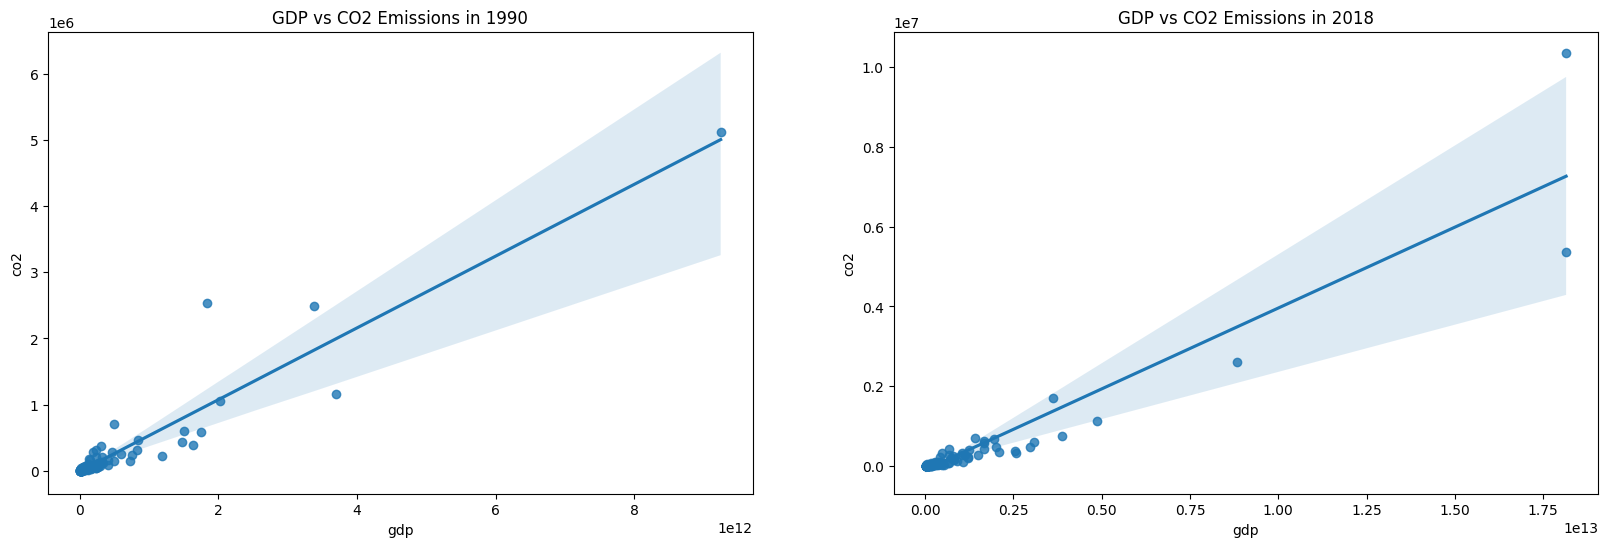

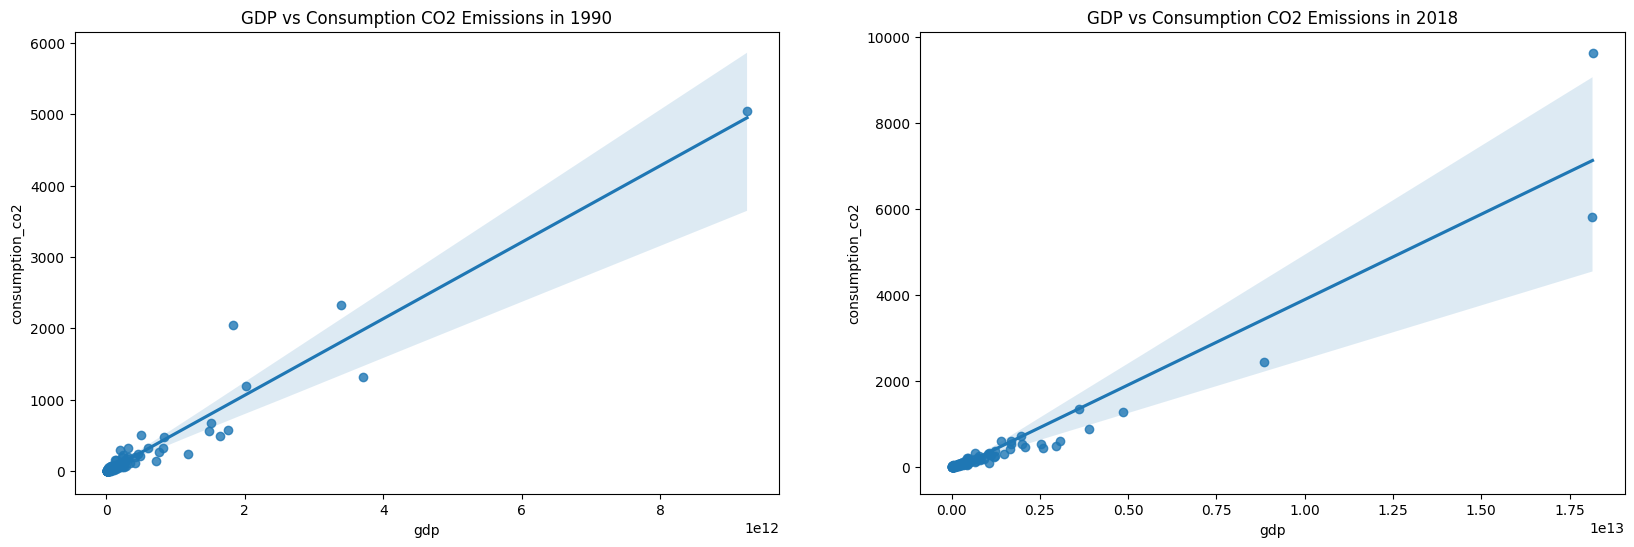

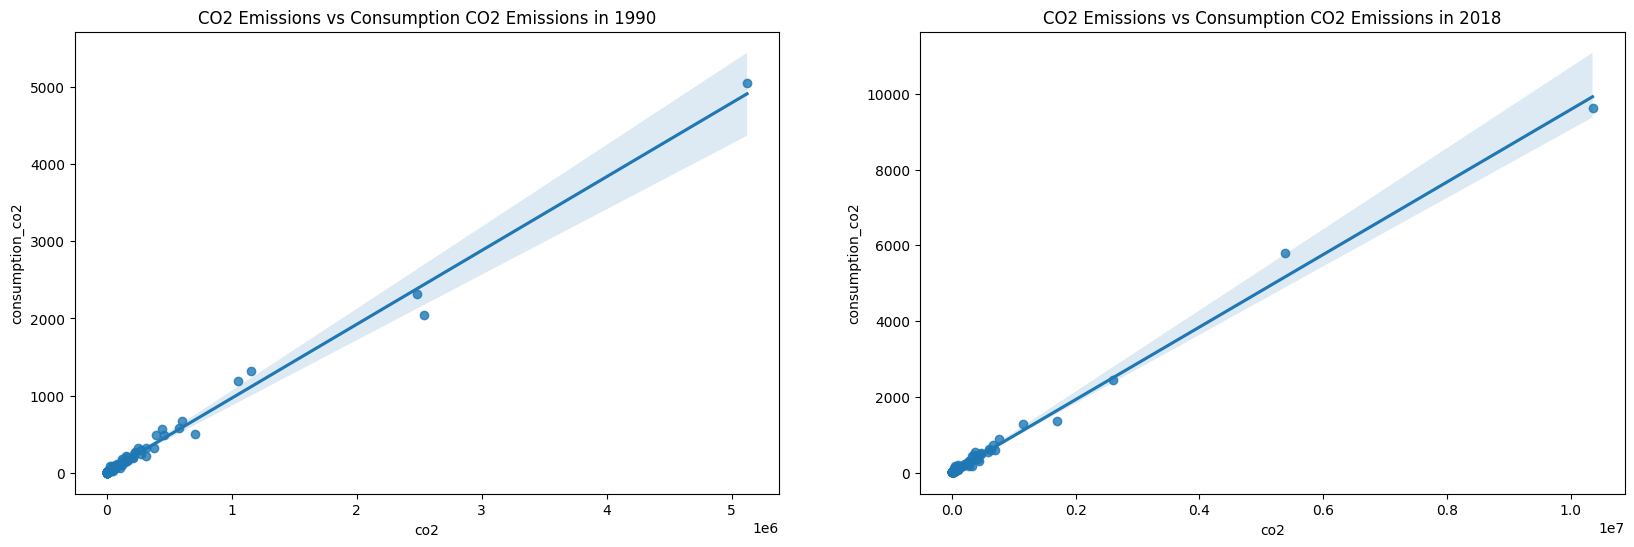

In [34]:
corr_matrix_final = data[['gdp','co2','consumption_co2']].corr()
data = data[data['country'] != 'World']

pearsonr_gdp_co2 = pearsonr(data['gdp'], data['co2'])[0]
pearsonr_gdp_consumption_co2 = pearsonr(data['gdp'], data['consumption_co2'])[0]
pearsonr_co2_consumption_co2 = pearsonr(data['co2'], data['consumption_co2'])[0]

print(f"Pearson Correlation between GDP and CO2 Emissions: {pearsonr_gdp_co2}")
print(f"Pearson Correlation between GDP and Consumption CO2 Emissions: {pearsonr_gdp_consumption_co2}")
print(f"Pearson Correlation between CO2 Emissions and Consumption CO2 Emissions: {pearsonr_co2_consumption_co2}")

plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix_final, annot=True, cmap='viridis')
plt.title("Correlation Matrix of GDP, CO2 and CO2 Consumption")
plt.show()

gdp_1990 = data[data['year'] == 1990]['gdp']
gdp_2018 = data[data['year'] == 2018]['gdp']

co2_1990 = data[data['year'] == 1990]['co2']
co2_2018 = data[data['year'] == 2018]['co2']

consumption_co2_1990 = data[data['year'] == 1990]['consumption_co2']
consumption_co2_2018 = data[data['year'] == 2018]['consumption_co2']


# Making the scatter plots
# ! row 1 GDP vs CO2 1990 vs 2018
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.regplot(x=gdp_1990, y=co2_1990)
plt.title("GDP vs CO2 Emissions in 1990")

plt.subplot(1, 2, 2)
sns.regplot(x=gdp_2018, y=co2_2018)
plt.title("GDP vs CO2 Emissions in 2018")

plt.show()

# ! row 2 GDP vs Consumption CO2 (1990 vs 2018)
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.regplot(x=gdp_1990, y=consumption_co2_1990)
plt.title("GDP vs Consumption CO2 Emissions in 1990")

plt.subplot(1, 2, 2)
sns.regplot(x=gdp_2018, y=consumption_co2_2018)
plt.title("GDP vs Consumption CO2 Emissions in 2018")

plt.show()

# ! row 3 CO2 vs Consumption CO2 (1990 vs 2018)
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.regplot(x=co2_1990, y=consumption_co2_1990)
plt.title("CO2 Emissions vs Consumption CO2 Emissions in 1990")

plt.subplot(1, 2, 2)
sns.regplot(x=co2_2018, y=consumption_co2_2018)
plt.title("CO2 Emissions vs Consumption CO2 Emissions in 2018")

plt.show()


#### Narrowed down version

In [26]:
corr_matrix_regular = data[['gdp', 'cement_co2', 'co2',
       'co2_including_luc',
        'coal_co2', 'consumption_co2','cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2',
       'flaring_co2', 'gas_co2', 'methane',
       'nitrous_oxide',
       'oil_co2',
       'other_industry_co2', 'primary_energy_consumption',
       'total_ghg', 'total_ghg_excluding_lucf']].corr()

# plt.figure(figsize=(25, 25))
# sns.heatmap(corr_matrix_regular, annot=True, cmap='viridis')
# plt.title("Correlation Matrix of Economic Indicators and CO2 Indicators")
# plt.show()

#### first try at correlation testing to narrow down

In [25]:
corr_matrix = data[['gdp', 'cement_co2', 'co2',
       'co2_including_luc',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2', 'consumption_co2',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2',
       'energy_per_gdp', 'flaring_co2','gas_co2',
       'land_use_change_co2', 'methane', 'nitrous_oxide',
       'oil_co2',
       'other_industry_co2', 'primary_energy_consumption',
       'total_ghg', 'total_ghg_excluding_lucf', 'trade_co2']].corr()

gdp_related_numbers = corr_matrix.loc['gdp']
# print(gdp_related_numbers.count())
# print(gdp_related_numbers)

# above_0_8 = gdp_related_numbers[gdp_related_numbers > 0.8]
# print("\n\n",above_0_8.count())
# print(above_0_8)


# above_0_85 = gdp_related_numbers[gdp_related_numbers > 0.85]
# print("\n\n",above_0_85.count())
# print(above_0_8)


# above_0_9 = gdp_related_numbers[gdp_related_numbers > 0.9]
# print("\n\n",above_0_9.count())
# print(above_0_9)


# plt.figure(figsize=(50, 50))
# sns.heatmap(corr_matrix, annot=True, cmap='viridis')
# plt.title("Correlation Matrix of Economic Indicators and CO2 Indicators")
# plt.show()



 11
gdp                             1.000000
co2                             0.941342
co2_including_luc               0.927488
consumption_co2                 0.966193
cumulative_co2                  0.911714
cumulative_co2_including_luc    0.900533
cumulative_coal_co2             0.911633
oil_co2                         0.933774
primary_energy_consumption      0.965467
total_ghg                       0.932481
total_ghg_excluding_lucf        0.934617
Name: gdp, dtype: float64


### Time Series

In [15]:
from scipy.stats import pearsonr

data_corr = data[data['country'] != 'World']

# List to store results
results = []

# Loop through each country and calculate the Pearson correlation
for country in data_corr['country'].unique():
    data_country = data_corr[data_corr['country'] == country]
    data_gdp = data_country['gdp']
    data_co2 = data_country['co2']
    
    # Calculate Pearson correlation
    corr, p_value = pearsonr(data_gdp, data_co2)
    
    # Store the results
    results.append({'country': country, 'pearson_corr': corr, 'p_value': p_value})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

with open('correlation_results_gdp_co2.txt', 'w') as file:
    file.write(results_df.to_string(index=False))

#### Hists for each Country

In [16]:
import os

# List of countries to plot
countries = data['country'].unique()

# Select the columns to plot
columns_to_plot = [
    'co2', 'co2_including_luc', 'coal_co2', 'consumption_co2',
    'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc',
    'cumulative_coal_co2', 'cumulative_oil_co2', 'nitrous_oxide', 'oil_co2',
     'primary_energy_consumption', 'total_ghg', 'total_ghg_excluding_lucf'
]

output_dir = 'plots'
os.makedirs(output_dir, exist_ok=True)

# Loop through each country and create line plots
for country in countries:
    data_country = data[data['country'] == country]
    
    # Create subplots
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
    
    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    
    # Plot the time series data for GDP
    sns.lineplot(data=data_country, x='year', y='gdp', ax=axes[0])
    axes[0].set_title(f'GDP Over Time - {country}')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('GDP')
    
    # Plot the time series for the selected columns
    for i, column in enumerate(columns_to_plot, start=1):
        sns.lineplot(data=data_country, x='year', y=column, ax=axes[i])
        axes[i].set_title(f'Time Series of {column} - {country}')
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel(column)
    
    # Remove any unused subplots
    for j in range(len(columns_to_plot) + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust layout
    plt.tight_layout()

    # Save the plot as an image file
    plt.savefig(os.path.join(output_dir, f'{country}_time_series.png'))
    
    # Close the figure to free up memory
    plt.close(fig)

#### India Hists

<Figure size 1400x700 with 0 Axes>

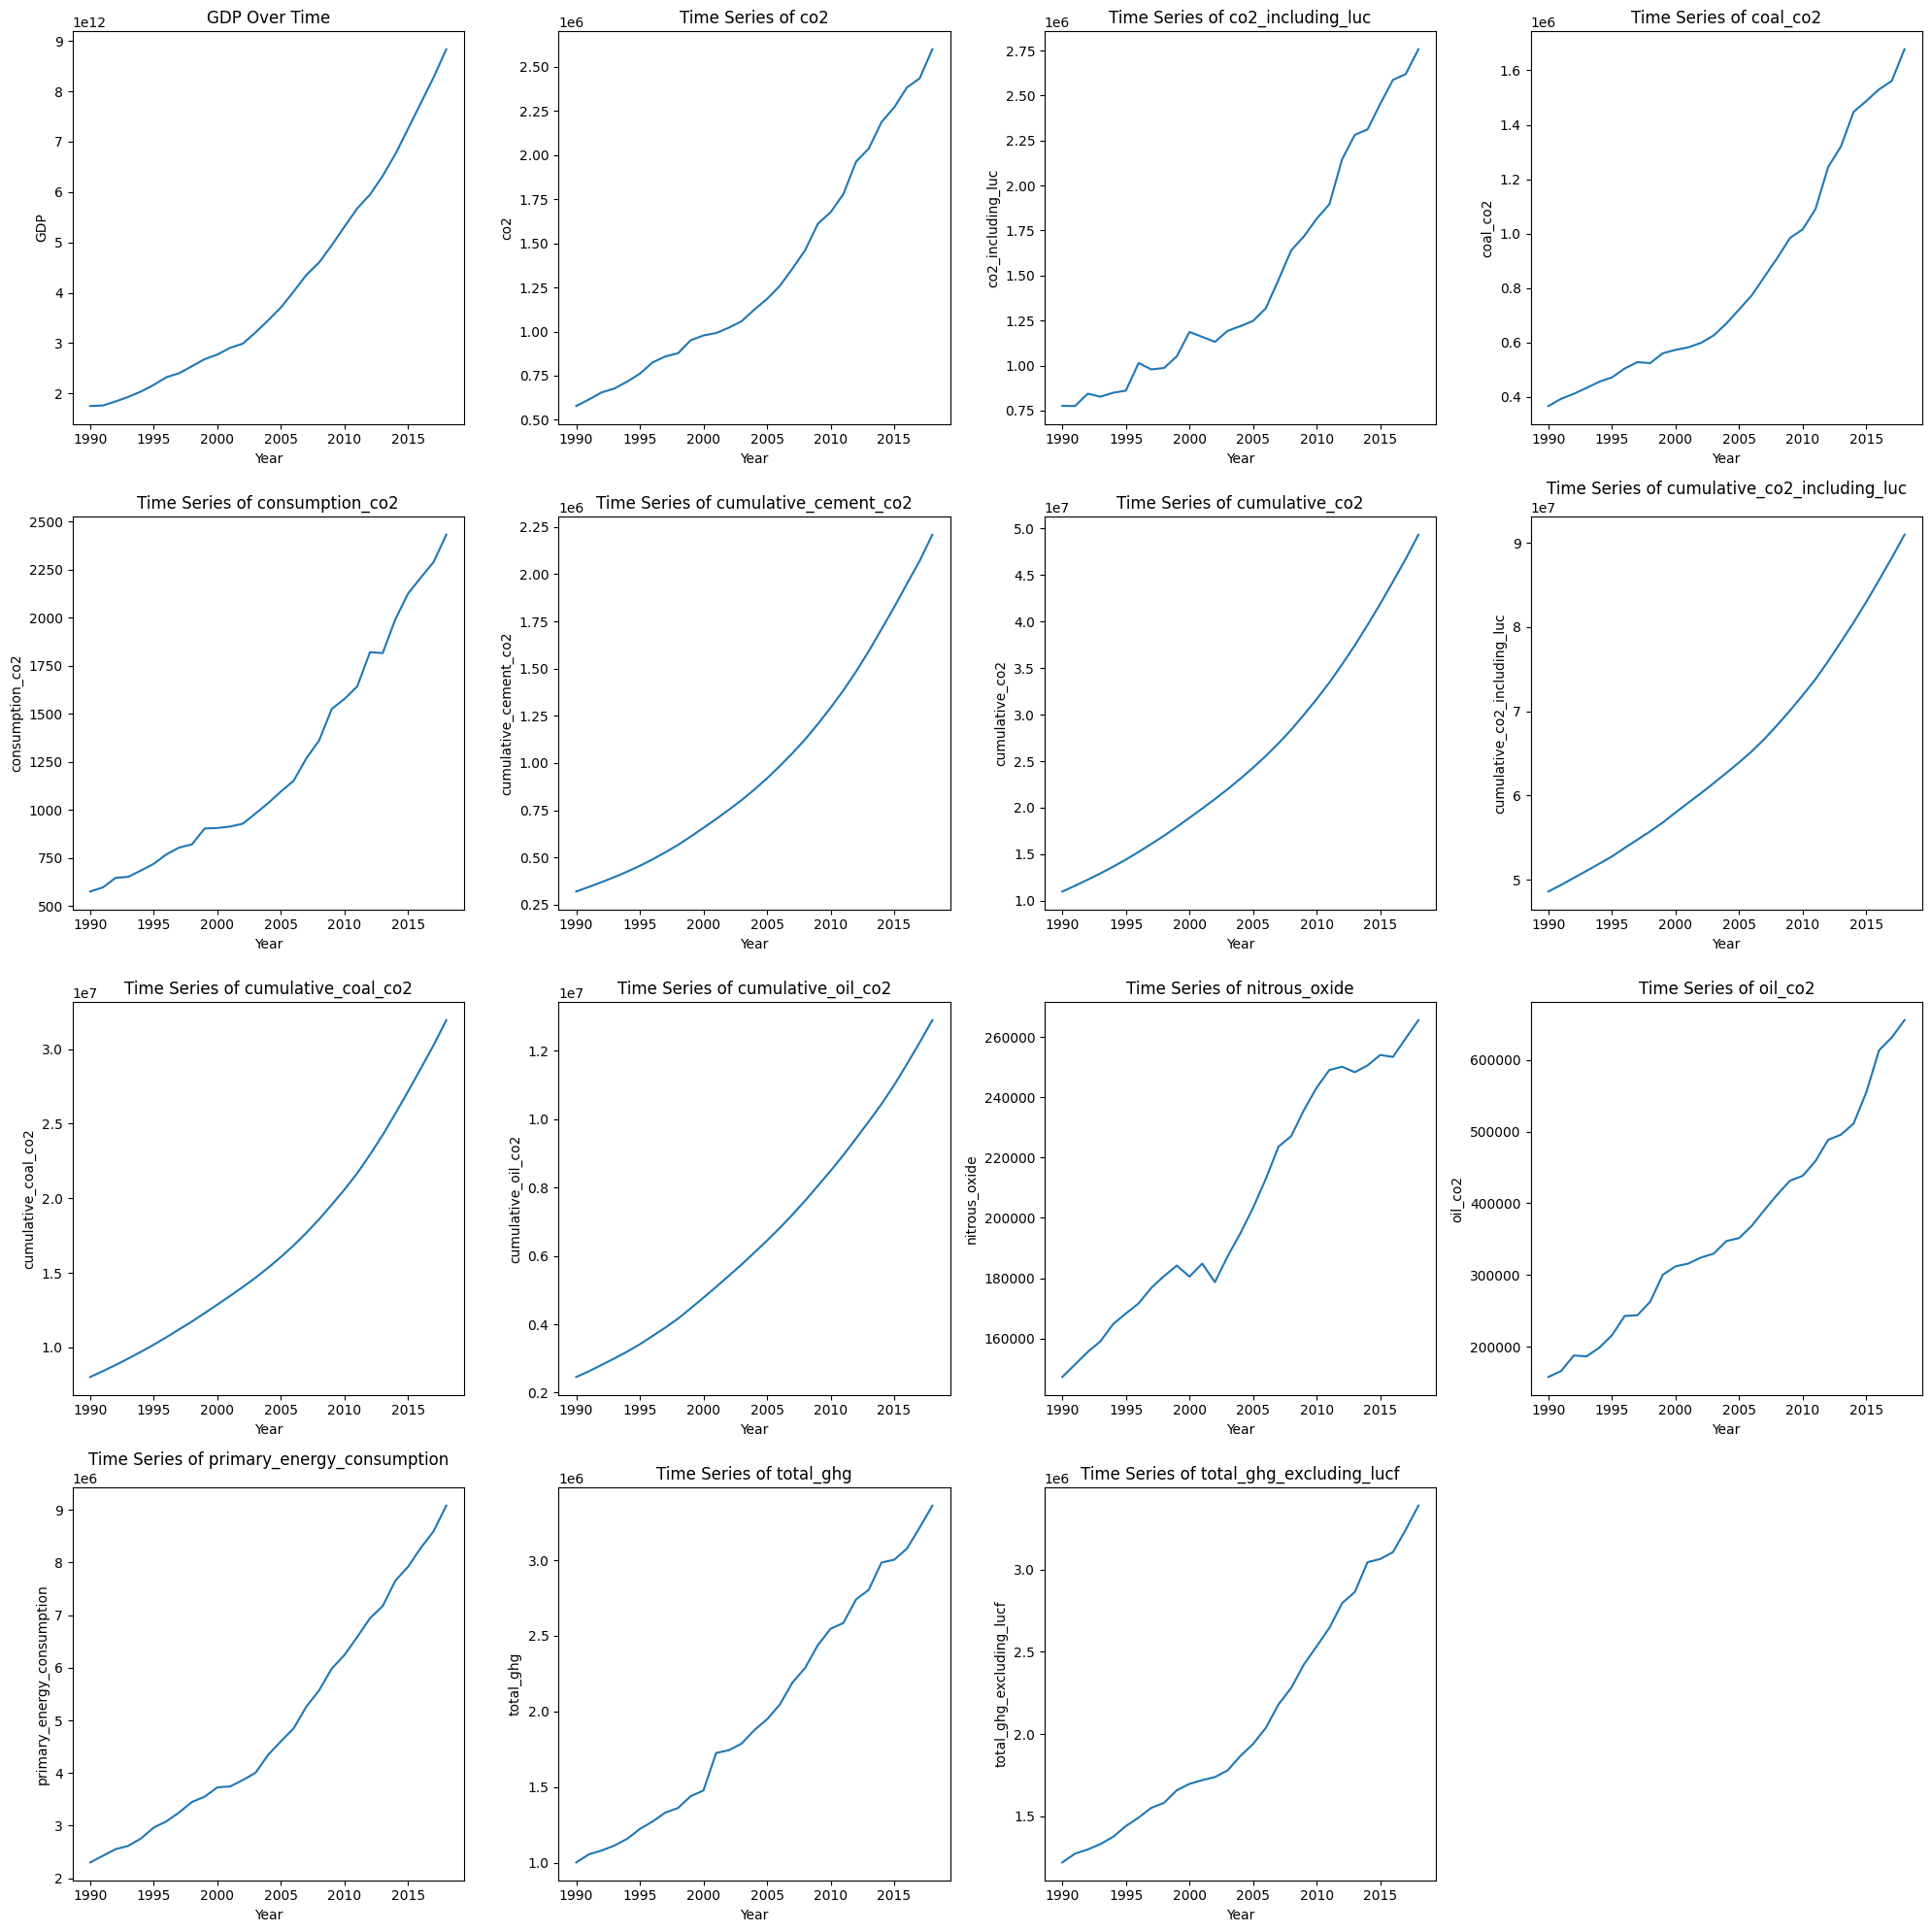

In [120]:
# Set the figure size
plt.figure(figsize=(14, 7))

data_india = data[data['country'] == 'India']

# Select the columns to plot
columns_to_plot = [
    'co2', 'co2_including_luc', 'coal_co2', 'consumption_co2',
    'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc',
    'cumulative_coal_co2', 'cumulative_oil_co2', 'nitrous_oxide', 'oil_co2',
    'primary_energy_consumption', 'total_ghg', 'total_ghg_excluding_lucf'
]

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the time series data for GDP
sns.lineplot(data=data_india, x='year', y='gdp', ax=axes[0])
axes[0].set_title('GDP Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('GDP')

# Plot the time series for the selected columns
for i, column in enumerate(columns_to_plot, start=1):
    sns.lineplot(data=data_india, x='year', y=column, ax=axes[i])
    axes[i].set_title(f'Time Series of {column}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(column)

# Remove any unused subplots
for j in range(len(columns_to_plot) + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### China Hists

<Figure size 1400x700 with 0 Axes>

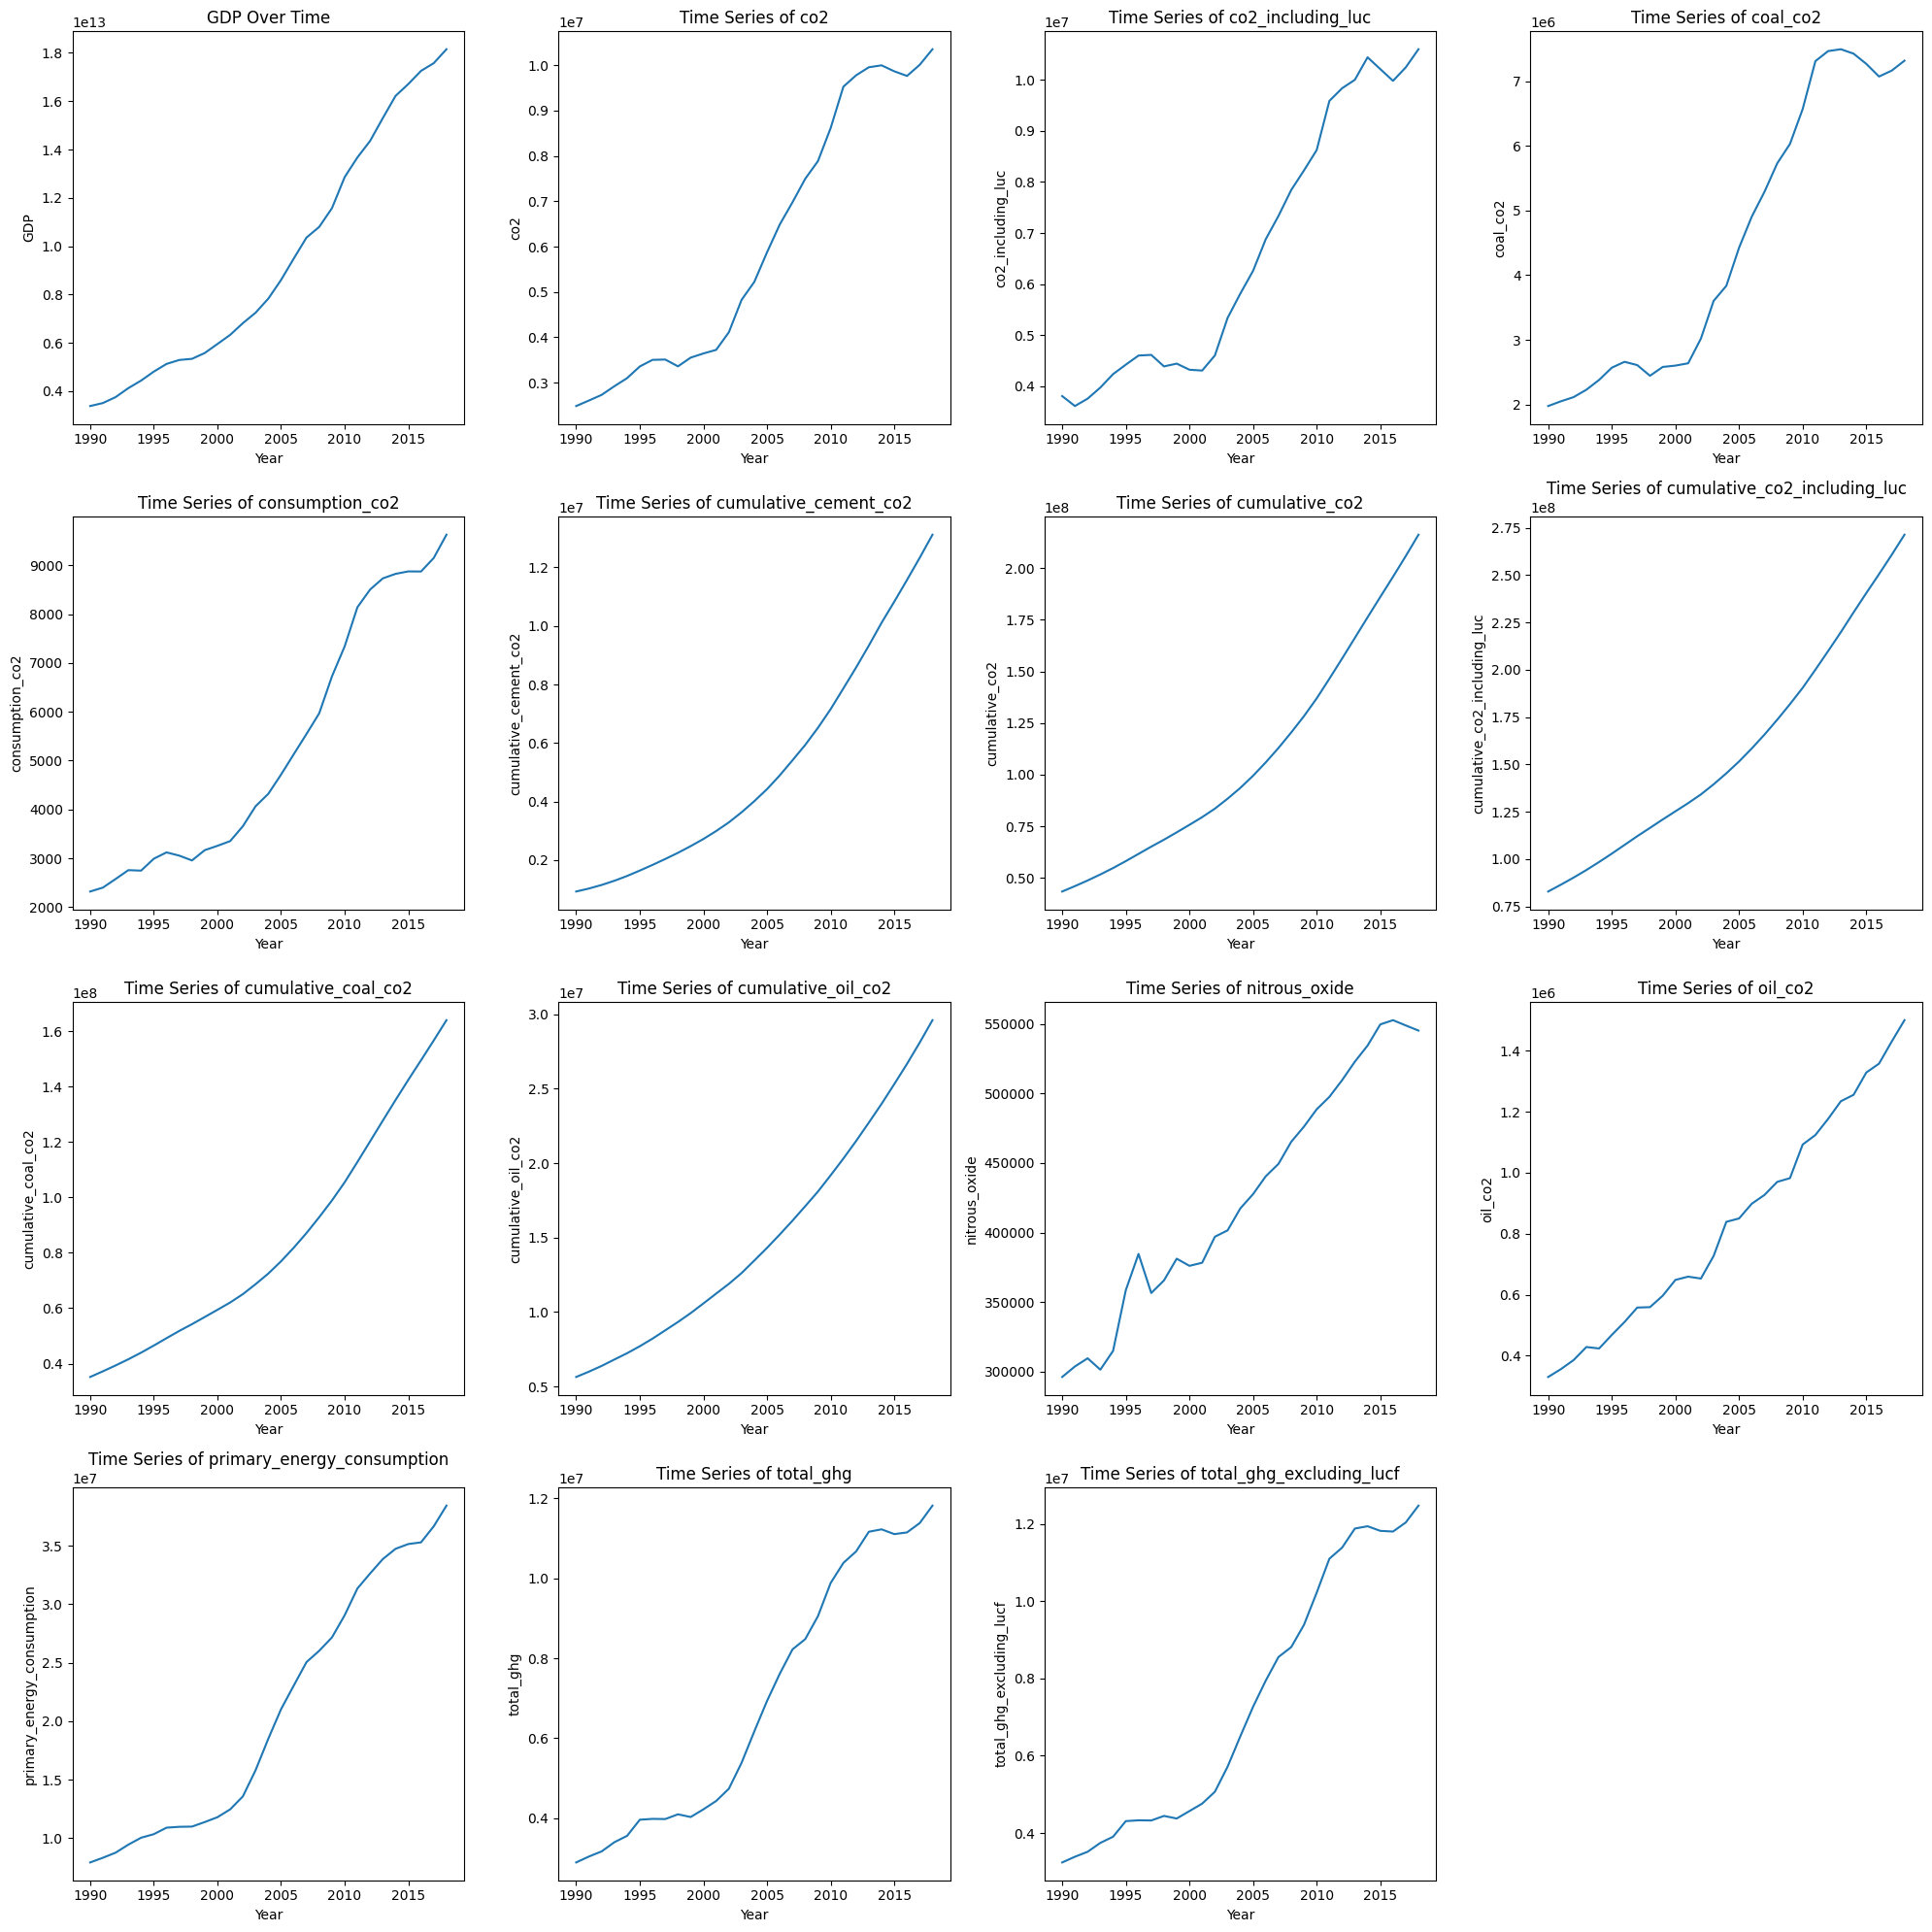

In [121]:
# Set the figure size
plt.figure(figsize=(14, 7))

data_china = data[data['country'] == 'China']

# Select the columns to plot
columns_to_plot = [
    'co2', 'co2_including_luc', 'coal_co2', 'consumption_co2',
    'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc',
    'cumulative_coal_co2', 'cumulative_oil_co2', 'nitrous_oxide', 'oil_co2',
    'primary_energy_consumption', 'total_ghg', 'total_ghg_excluding_lucf'
]

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the time series data for GDP
sns.lineplot(data=data_china, x='year', y='gdp', ax=axes[0])
axes[0].set_title('GDP Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('GDP')

# Plot the time series for the selected columns
for i, column in enumerate(columns_to_plot, start=1):
    sns.lineplot(data=data_china, x='year', y=column, ax=axes[i])
    axes[i].set_title(f'Time Series of {column}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(column)

# Remove any unused subplots
for j in range(len(columns_to_plot) + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### World Hists

<Figure size 1400x700 with 0 Axes>

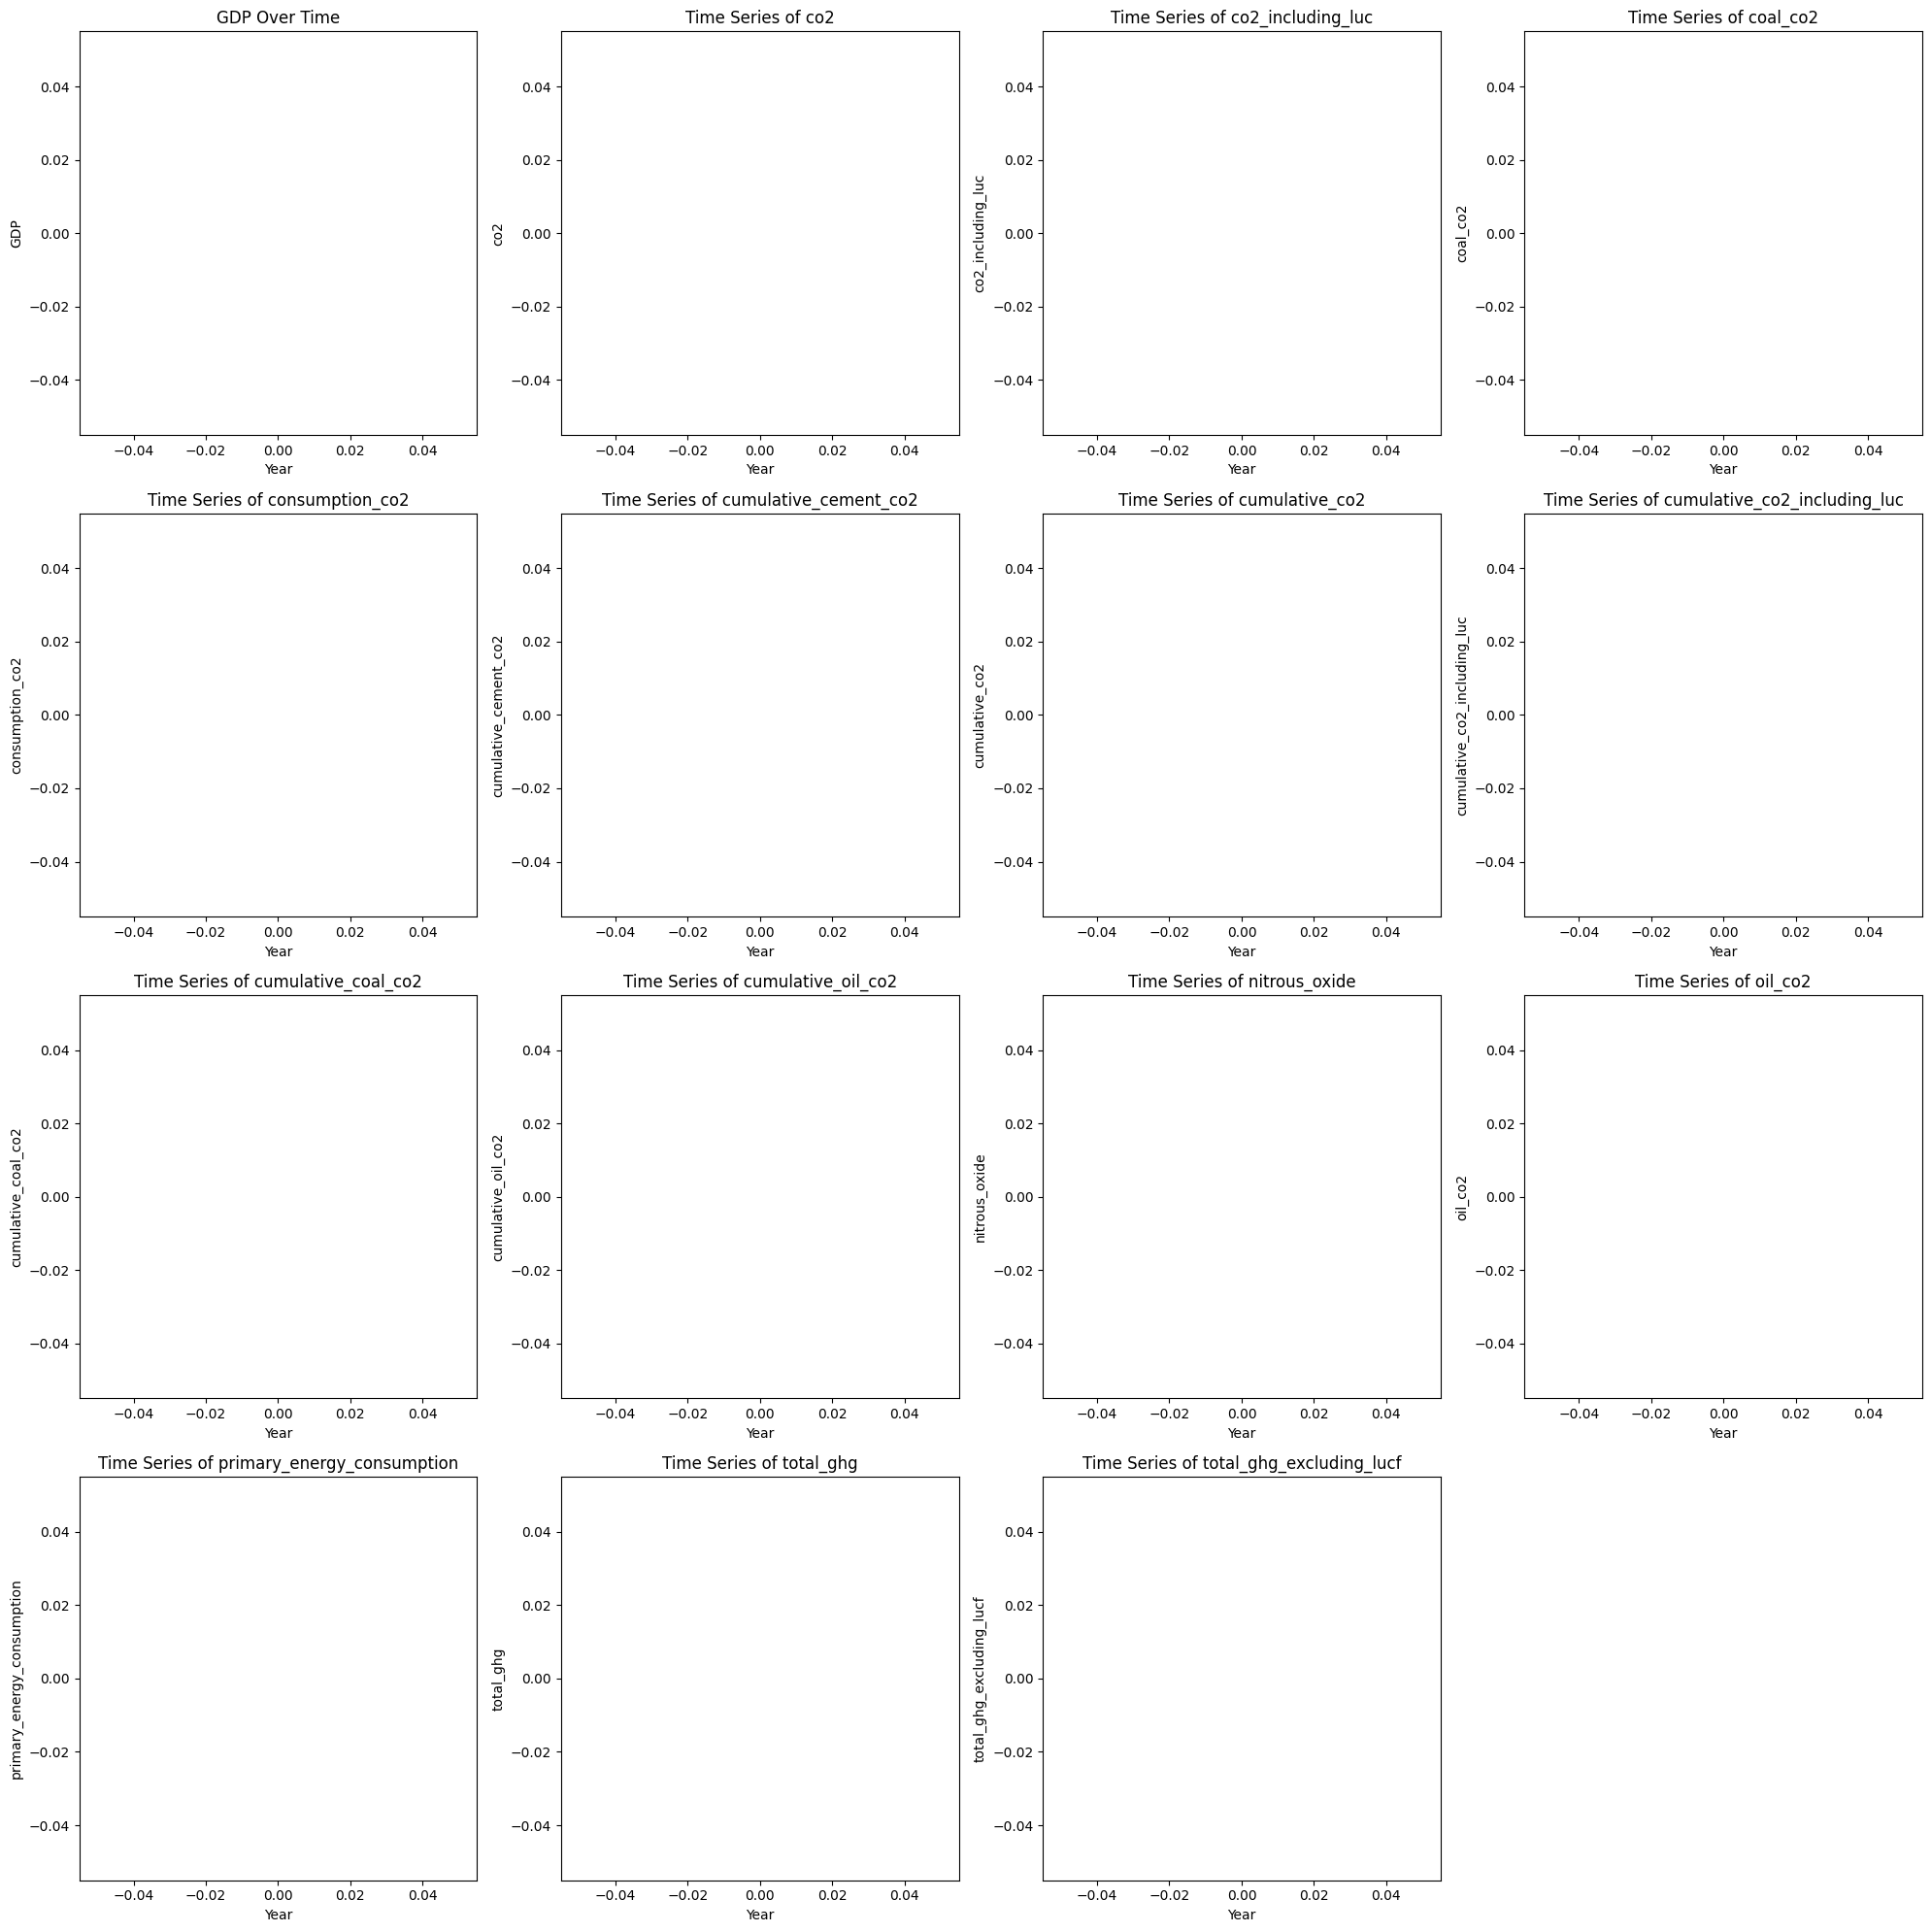

In [122]:
# Set the figure size
plt.figure(figsize=(14, 7))

data_world = data[data['country'] == 'World']

# Select the columns to plot
columns_to_plot = [
    'co2', 'co2_including_luc', 'coal_co2', 'consumption_co2',
    'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc',
    'cumulative_coal_co2', 'cumulative_oil_co2', 'nitrous_oxide', 'oil_co2',
    'primary_energy_consumption', 'total_ghg', 'total_ghg_excluding_lucf'
]

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the time series data for GDP
sns.lineplot(data=data_world, x='year', y='gdp', ax=axes[0])
axes[0].set_title('GDP Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('GDP')

# Plot the time series for the selected columns
for i, column in enumerate(columns_to_plot, start=1):
    sns.lineplot(data=data_world, x='year', y=column, ax=axes[i])
    axes[i].set_title(f'Time Series of {column}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(column)

# Remove any unused subplots
for j in range(len(columns_to_plot) + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Nederland Hists

<Figure size 1400x700 with 0 Axes>

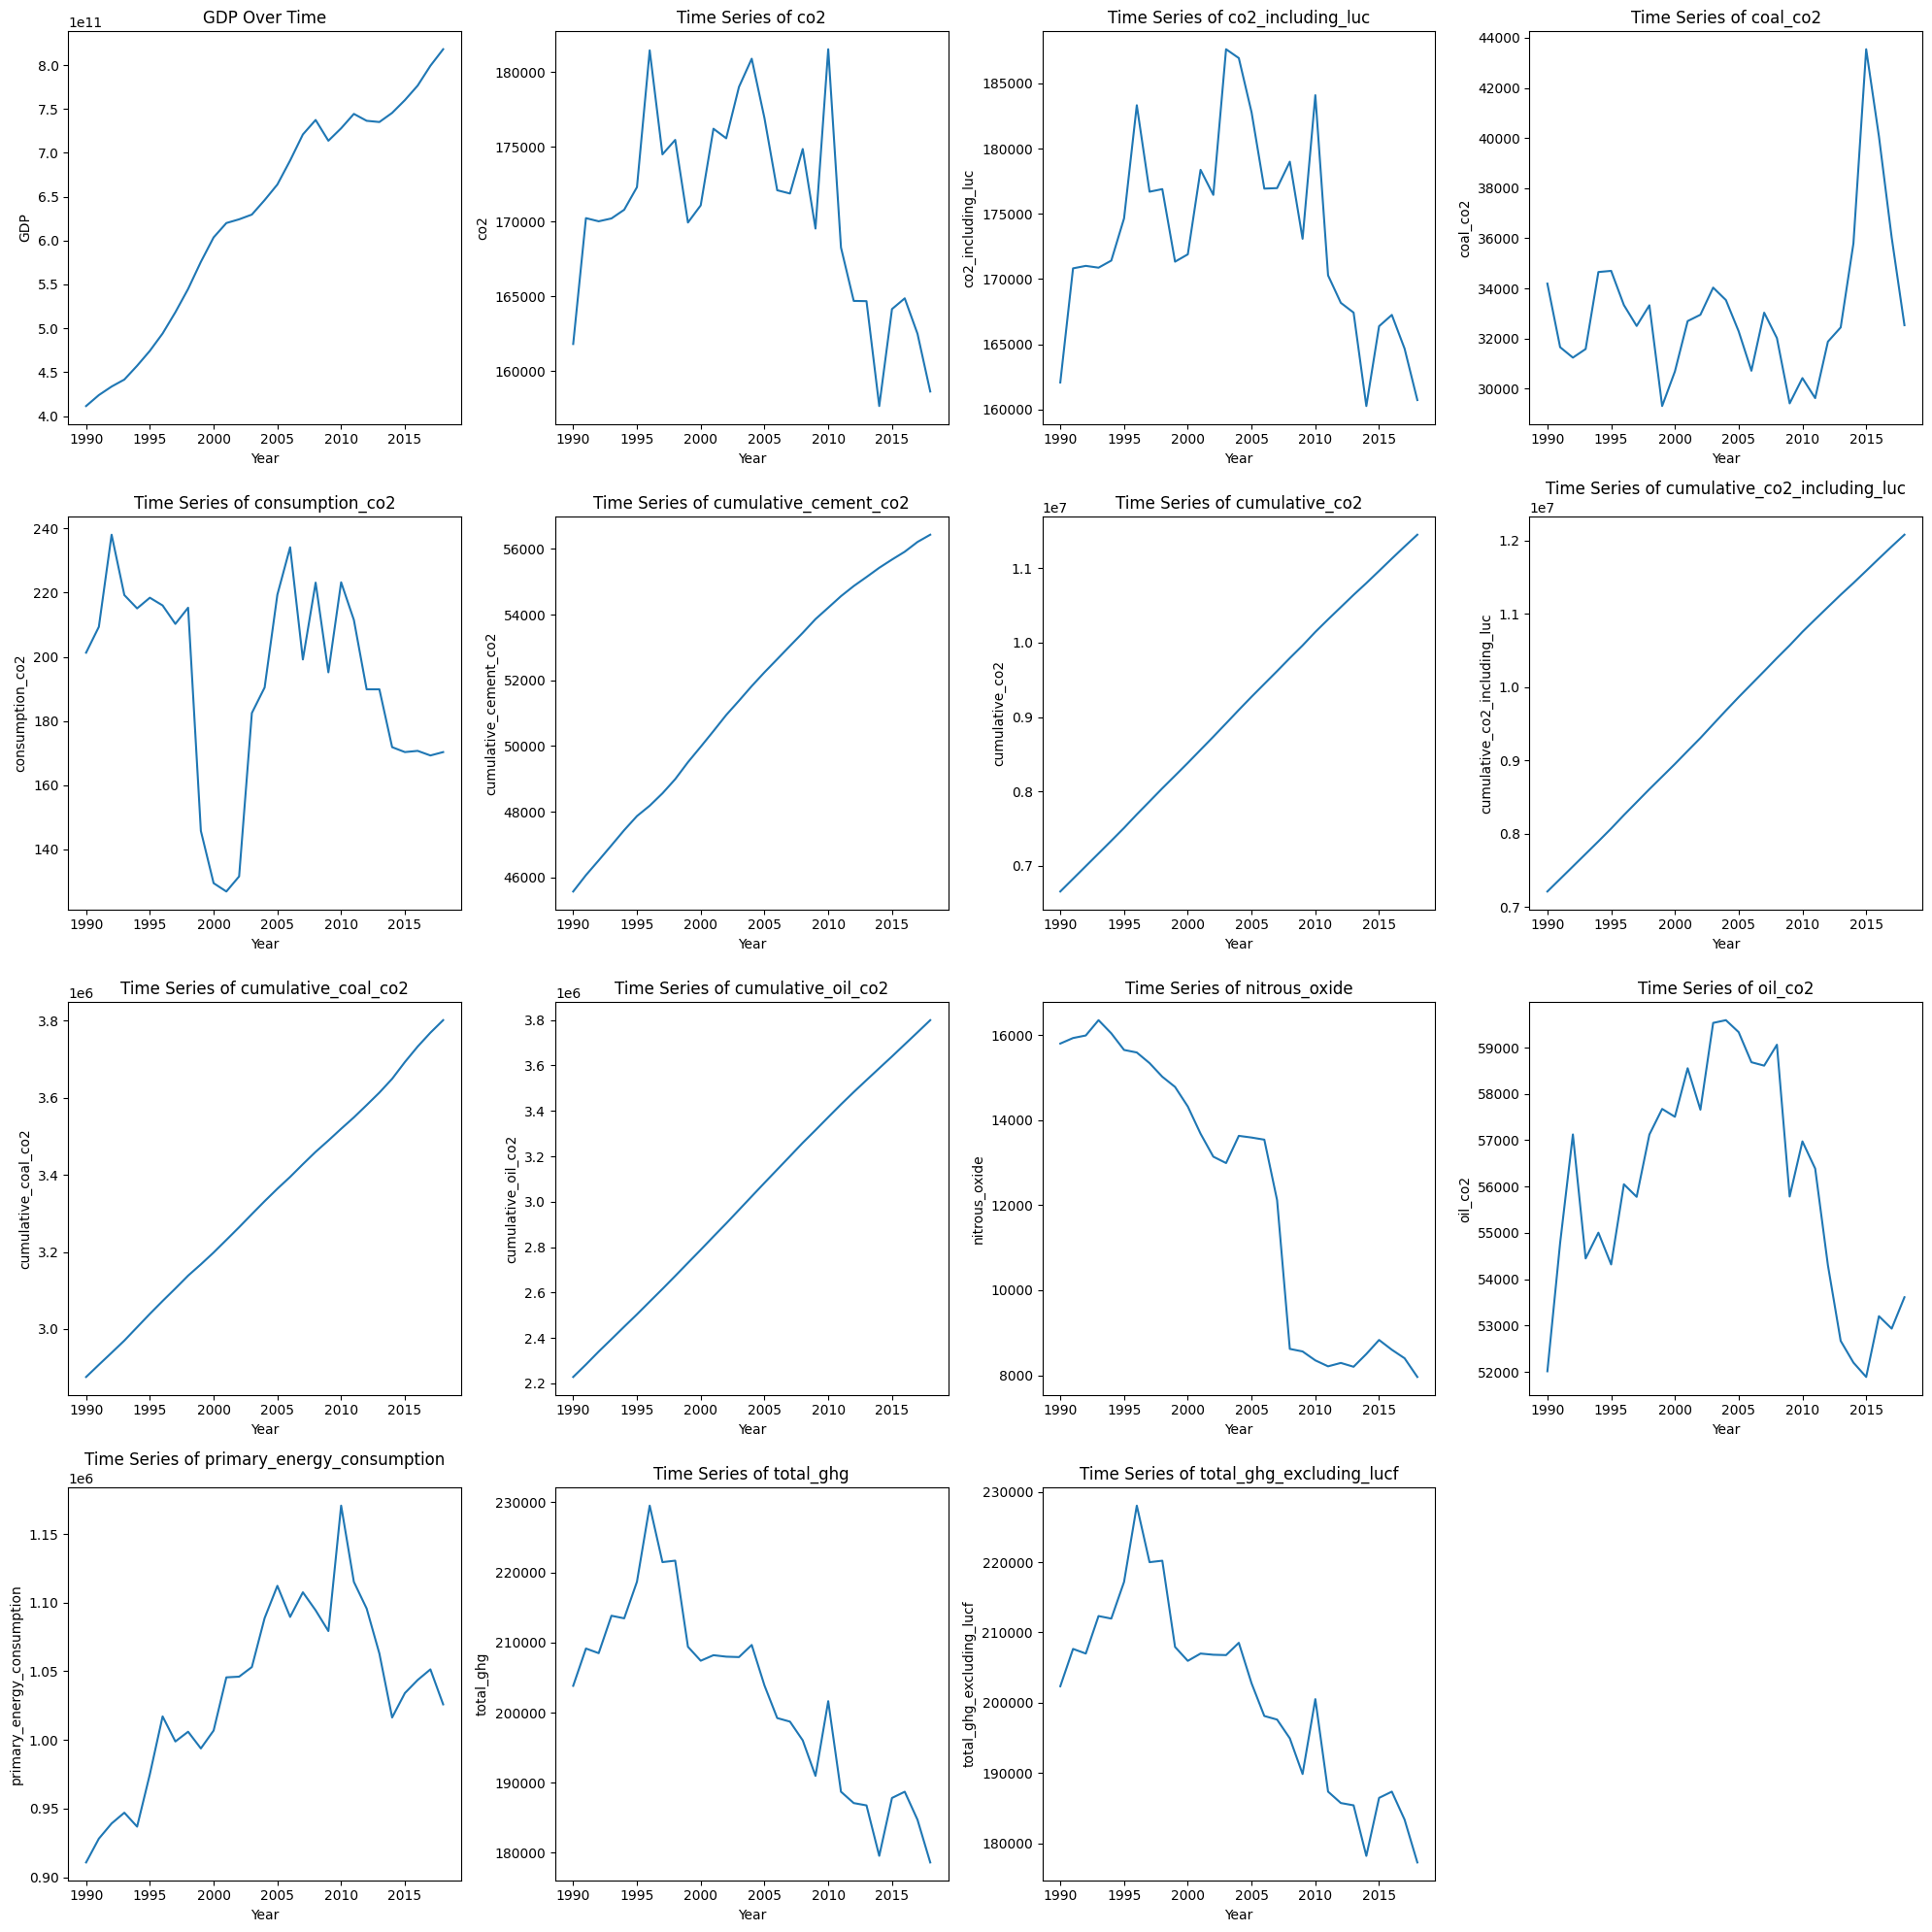

In [123]:
# Set the figure size
plt.figure(figsize=(14, 7))

data_nederland= data[data['country'] == 'Netherlands']

# Select the columns to plot
columns_to_plot = [
    'co2', 'co2_including_luc', 'coal_co2', 'consumption_co2',
    'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc',
    'cumulative_coal_co2', 'cumulative_oil_co2', 'nitrous_oxide', 'oil_co2',
    'primary_energy_consumption', 'total_ghg', 'total_ghg_excluding_lucf'
]

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the time series data for GDP
sns.lineplot(data=data_nederland, x='year', y='gdp', ax=axes[0])
axes[0].set_title('GDP Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('GDP')

# Plot the time series for the selected columns
for i, column in enumerate(columns_to_plot, start=1):
    sns.lineplot(data=data_nederland, x='year', y=column, ax=axes[i])
    axes[i].set_title(f'Time Series of {column}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(column)

# Remove any unused subplots
for j in range(len(columns_to_plot) + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Germany Hists

<Figure size 1400x700 with 0 Axes>

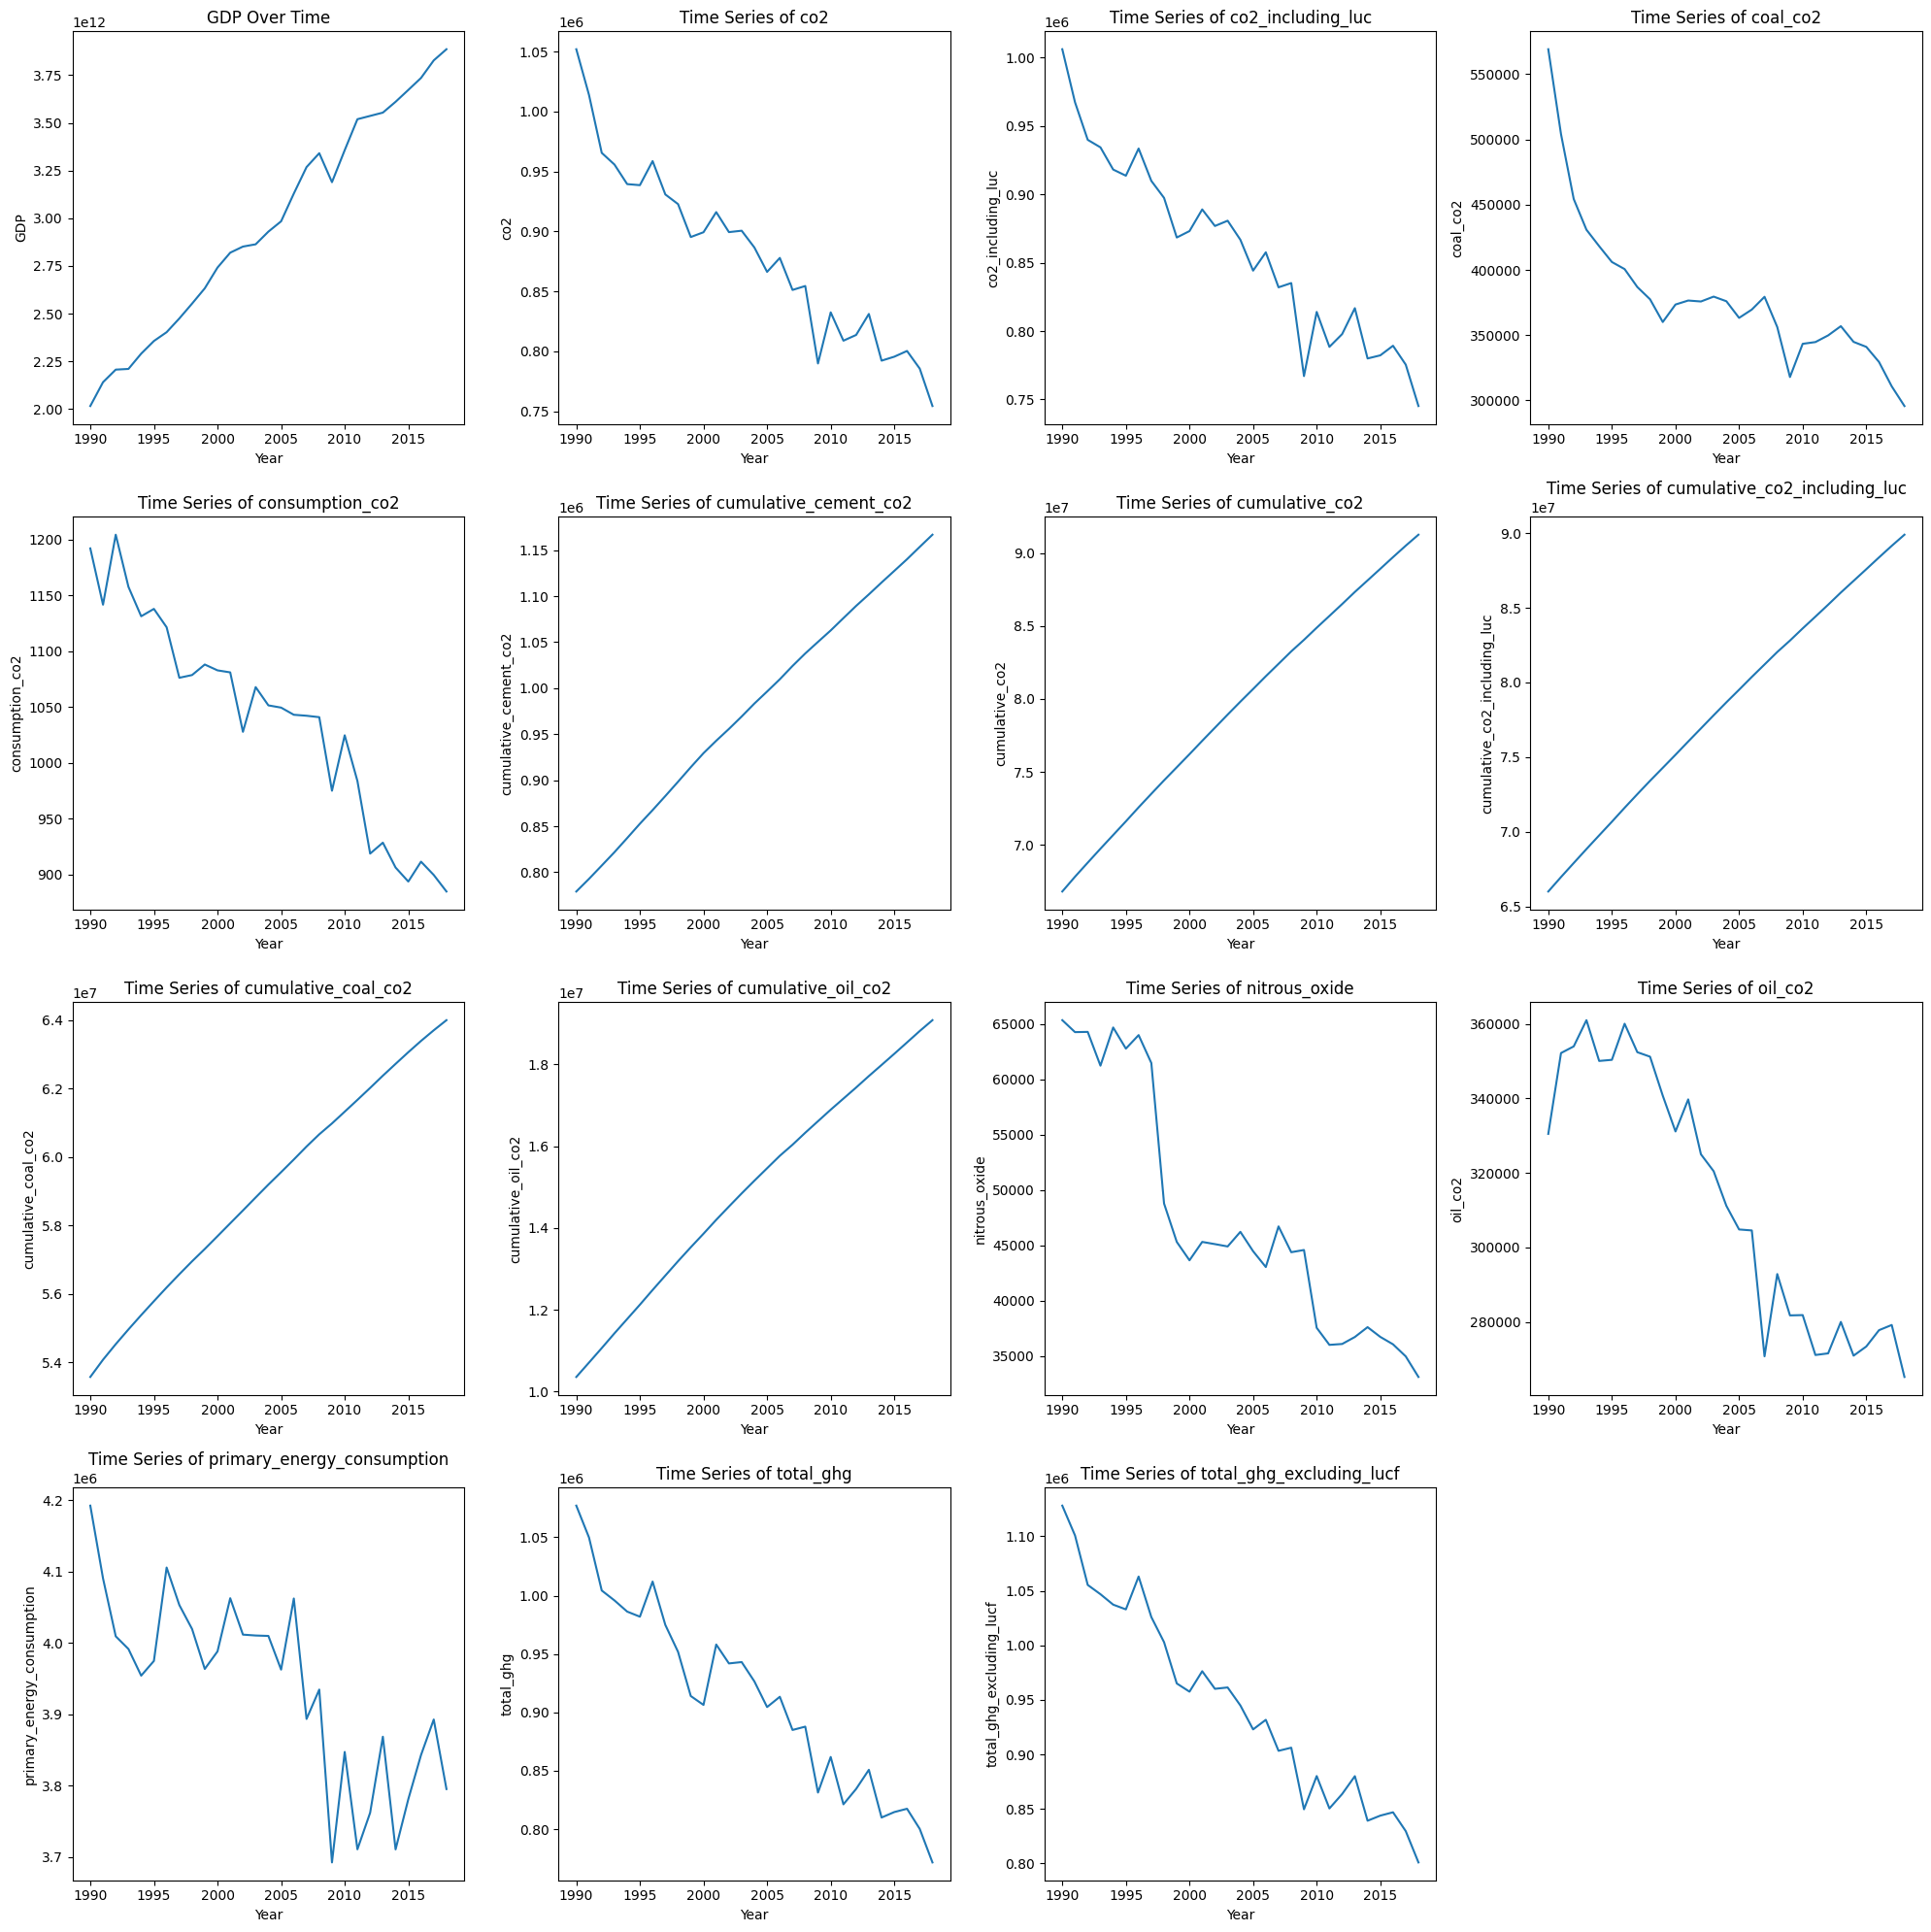

In [125]:
# Set the figure size
plt.figure(figsize=(14, 7))

data_germany= data[data['country'] == 'Germany']

# Select the columns to plot
columns_to_plot = [
    'co2', 'co2_including_luc', 'coal_co2', 'consumption_co2',
    'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc',
    'cumulative_coal_co2', 'cumulative_oil_co2', 'nitrous_oxide', 'oil_co2',
    'primary_energy_consumption', 'total_ghg', 'total_ghg_excluding_lucf'
]

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the time series data for GDP
sns.lineplot(data=data_germany, x='year', y='gdp', ax=axes[0])
axes[0].set_title('GDP Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('GDP')

# Plot the time series for the selected columns
for i, column in enumerate(columns_to_plot, start=1):
    sns.lineplot(data=data_germany, x='year', y=column, ax=axes[i])
    axes[i].set_title(f'Time Series of {column}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(column)

# Remove any unused subplots
for j in range(len(columns_to_plot) + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()